Práctico 2 - visualización de datos

Paleta de colores
['#f5f5f1', '#e50914', '#b20710', '#221f1f']


In [8]:
import pandas as pd
df = pd.read_csv("netflix.csv")

# Guarda el resultado en un archivo Excel nuevo
# df.to_excel("netflix.xlsx",index=False)

Pregunta 1

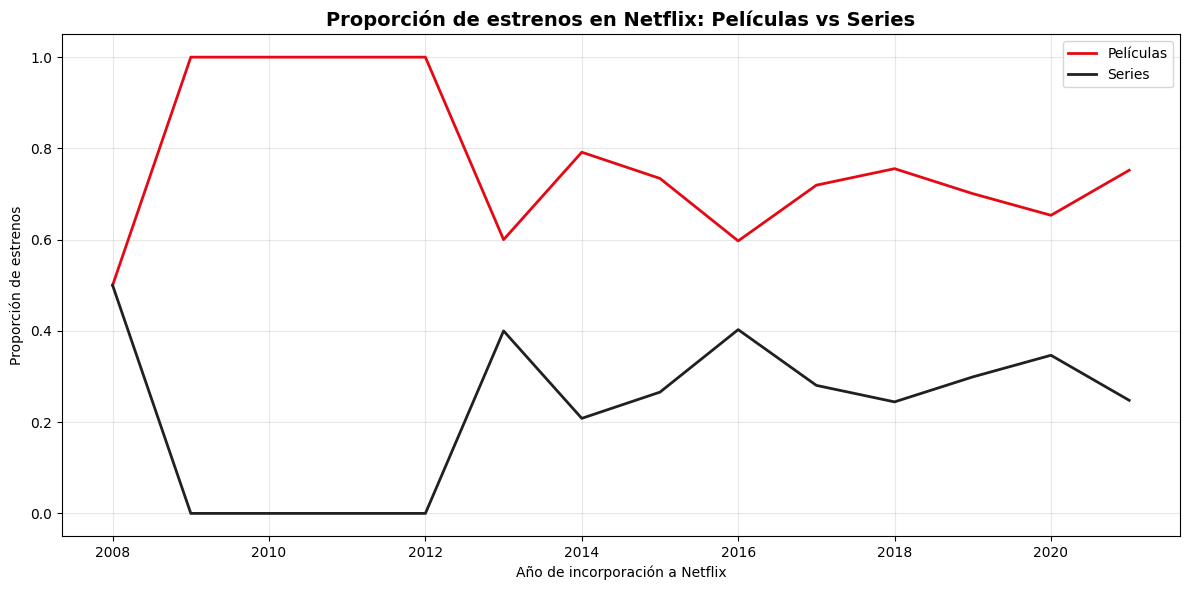

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"   # Reemplaza con tu ruta real
PALETTE = ['#f5f5f1', '#e50914', '#b20710', '#221f1f']

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)

# Parsear fecha de incorporación
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer año de incorporación
df['year_added'] = df['date_added'].dt.year

# Eliminar filas sin fecha
df = df.dropna(subset=['year_added'])

# ============================
# Agrupar por año y tipo
# ============================
counts = df.groupby(['year_added', 'type']).size().reset_index(name="count")

# Pivotear para calcular proporciones
pivot = counts.pivot(index="year_added", columns="type", values="count").fillna(0)

# Calcular proporciones por año
pivot['total'] = pivot.sum(axis=1)
pivot['Movie_ratio'] = pivot.get('Movie', 0) / pivot['total']
pivot['TV Show_ratio'] = pivot.get('TV Show', 0) / pivot['total']

# ============================
# Visualización
# ============================
plt.figure(figsize=(12,6))
plt.plot(pivot.index, pivot['Movie_ratio'], label="Películas", color=PALETTE[1], linewidth=2)
plt.plot(pivot.index, pivot['TV Show_ratio'], label="Series", color=PALETTE[3], linewidth=2)

plt.title("Proporción de estrenos en Netflix: Películas vs Series", fontsize=14, weight="bold")
plt.xlabel("Año de incorporación a Netflix")
plt.ylabel("Proporción de estrenos")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Pregunta 2

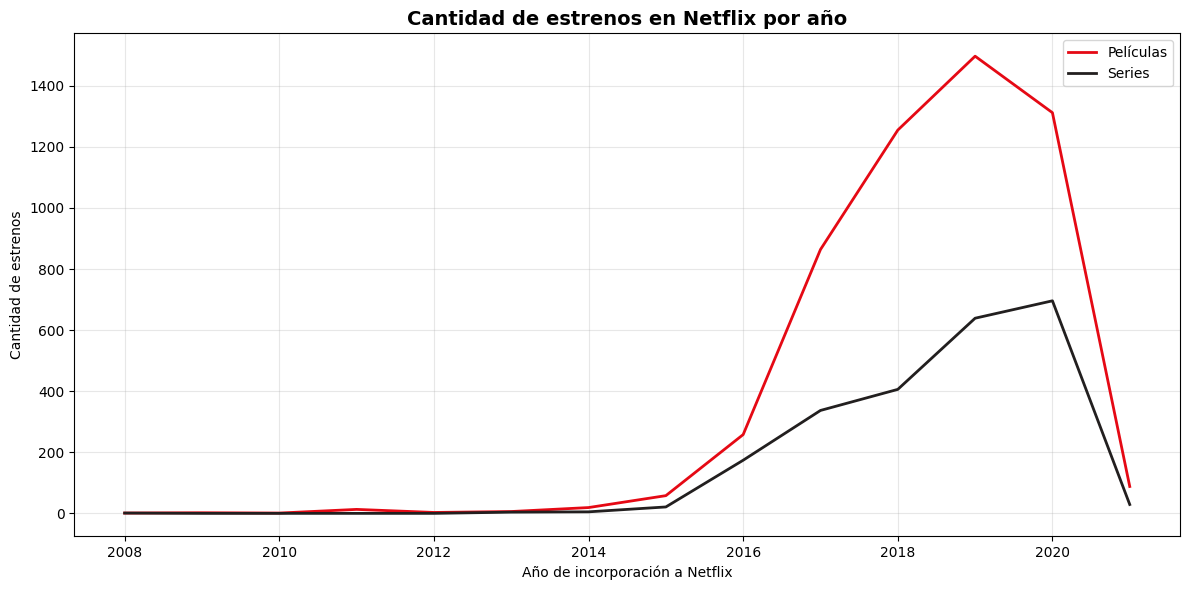

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"   # Reemplaza con tu archivo real
PALETTE = ['#f5f5f1', '#e50914', '#b20710', '#221f1f']

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)

# Parsear fecha de incorporación
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer año de incorporación
df['year_added'] = df['date_added'].dt.year

# Eliminar filas sin fecha
df = df.dropna(subset=['year_added'])

# ============================
# Agrupar por año y tipo
# ============================
counts = df.groupby(['year_added', 'type']).size().reset_index(name="count")

# Pivotear para que cada tipo tenga su columna
pivot = counts.pivot(index="year_added", columns="type", values="count").fillna(0)

# ============================
# Visualización
# ============================
plt.figure(figsize=(12,6))
plt.plot(pivot.index, pivot['Movie'], label="Películas", color=PALETTE[1], linewidth=2)
plt.plot(pivot.index, pivot['TV Show'], label="Series", color=PALETTE[3], linewidth=2)

plt.title("Cantidad de estrenos en Netflix por año", fontsize=14, weight="bold")
plt.xlabel("Año de incorporación a Netflix")
plt.ylabel("Cantidad de estrenos")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Pregunta 3

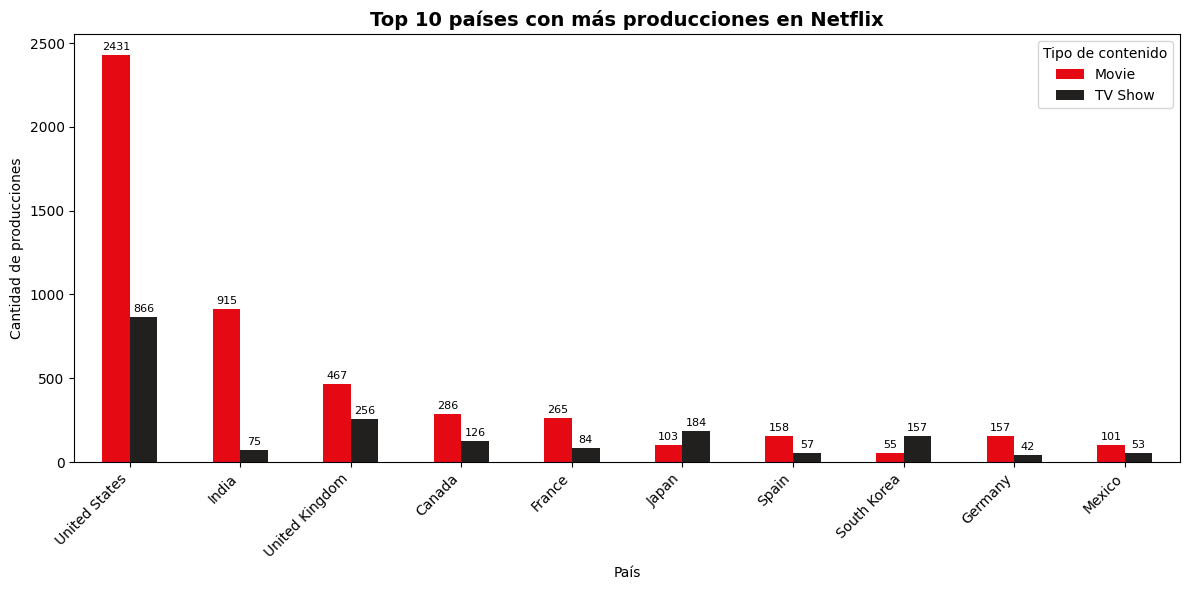

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"
PALETTE = ['#e50914', '#221f1f']  # rojo = películas, negro = series

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)

# Manejar valores nulos
df = df.dropna(subset=['country'])

# Separar países múltiples en filas distintas
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

# Agrupar por país y tipo
country_counts = df.groupby(['country', 'type']).size().reset_index(name="count")

# Ordenar países por total de producciones
top_countries = (
    country_counts.groupby('country')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar solo top 10
top_data = country_counts[country_counts['country'].isin(top_countries)]

# Pivotear para gráfico
pivot = top_data.pivot(index="country", columns="type", values="count").fillna(0)

# Ordenar países por el total de producciones (de mayor a menor)
pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total", ascending=False)
pivot = pivot.drop(columns="total")

# ============================
# Visualización
# ============================
ax = pivot.plot(kind="bar", figsize=(12,6), color=PALETTE)

plt.title("Top 10 países con más producciones en Netflix", fontsize=14, weight="bold")
plt.xlabel("País")
plt.ylabel("Cantidad de producciones")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de contenido")

# Mostrar los valores arriba de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2)

plt.tight_layout()
plt.show()


Pregunta 4

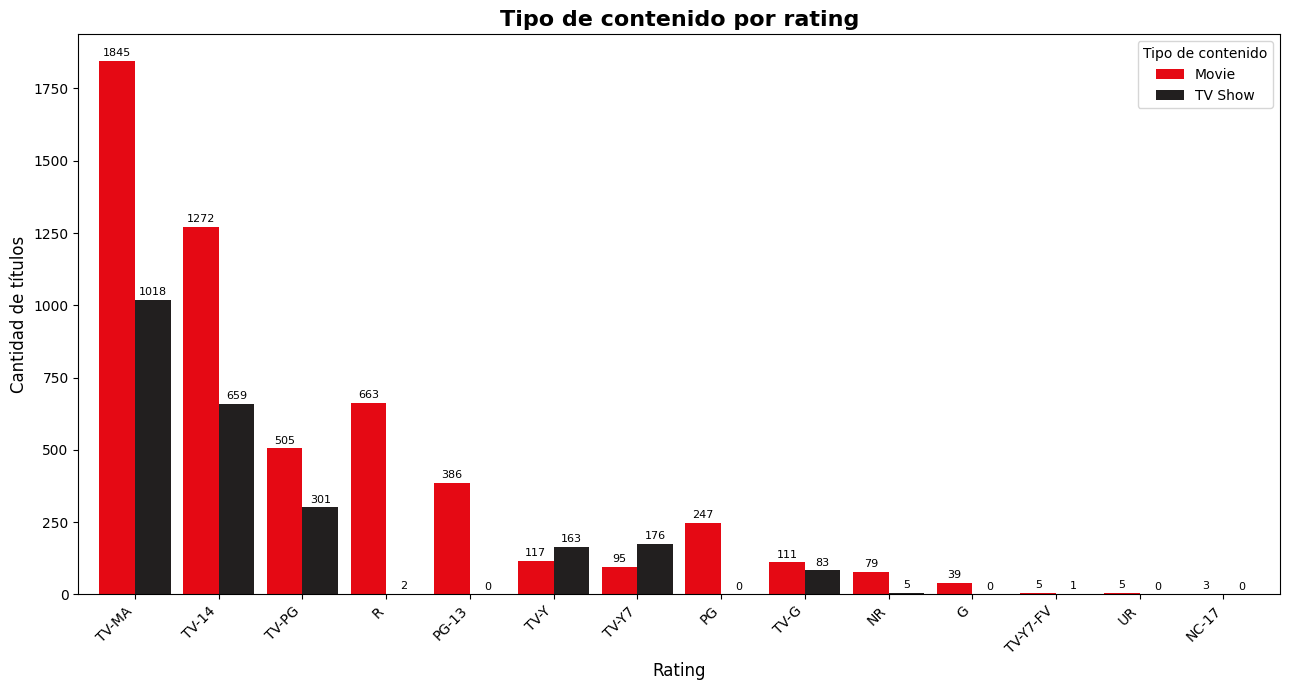

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"
PALETTE = {'Movie': '#e50914', 'TV Show': '#221f1f'}

# ============================
# Cargar y limpiar
# ============================
df = pd.read_csv(INPUT_CSV)
df = df[['type', 'rating']].dropna(subset=['rating', 'type'])
df['rating'] = df['rating'].astype(str).str.strip()
df['type']   = df['type'].astype(str).str.strip()

# ============================
# Conteos por rating y tipo
# ============================
counts = df.groupby(['rating', 'type']).size().reset_index(name='count')

order = (
    counts.groupby('rating')['count']
          .sum()
          .sort_values(ascending=False)
          .index
)

pivot = (
    counts.pivot(index='rating', columns='type', values='count')
          .fillna(0)
          .reindex(order)
)

for col in ['Movie', 'TV Show']:
    if col not in pivot.columns:
        pivot[col] = 0

# ============================
# Visualización
# ============================
# Ajustar tamaño dinámico: 0.6 pulgadas por categoría
fig_width = max(13, len(pivot) * 0.6)

ax = pivot.plot(
    kind='bar',
    figsize=(fig_width, 7),
    color=[PALETTE.get(c, None) for c in pivot.columns],
    width=0.85
)

plt.title("Tipo de contenido por rating", fontsize=16, weight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Cantidad de títulos", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.legend(title="Tipo de contenido")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2)

plt.tight_layout()
plt.show()


Pregunta 5

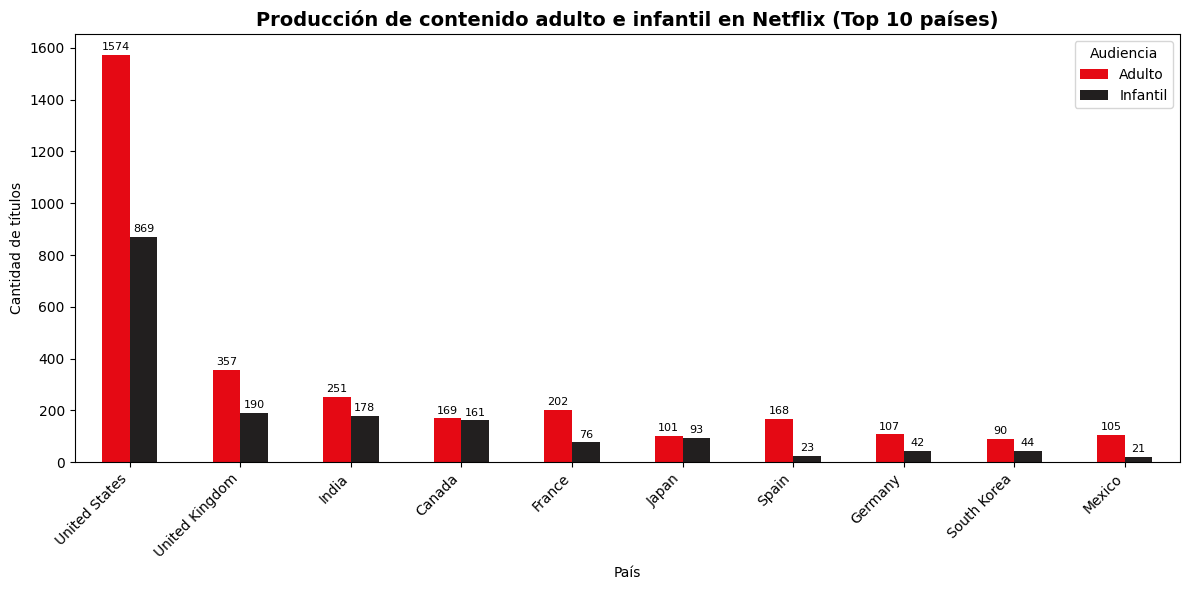

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"
PALETTE = {'Adulto': '#e50914', 'Infantil': '#221f1f'}

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)
df = df[['country', 'rating']].dropna(subset=['country', 'rating'])

# ============================
# Clasificación de audiencias
# ============================
adult = ['TV-MA', 'R', 'NC-17']
kids  = ['TV-Y', 'TV-Y7', 'TV-G', 'PG', 'TV-PG', 'G']
teens = ['PG-13', 'TV-14']

def classify(r):
    if r in adult:
        return "Adulto"
    elif r in kids:
        return "Infantil"
    elif r in teens:
        return "Adolescente"
    else:
        return "Otro"

df['audiencia'] = df['rating'].apply(classify)

# ============================
# Separar países múltiples
# ============================
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

# ============================
# Conteo por país y audiencia
# ============================
counts = df.groupby(['country', 'audiencia']).size().reset_index(name='count')

# Top 10 países por total de títulos
top_countries = (
    counts.groupby('country')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_data = counts[counts['country'].isin(top_countries)]
pivot = top_data.pivot(index="country", columns="audiencia", values="count").fillna(0)

# Ordenar países por la suma de Adulto + Infantil
pivot = pivot[['Adulto','Infantil']].copy()
pivot['total'] = pivot.sum(axis=1)
pivot = pivot.sort_values('total', ascending=False)
pivot = pivot.drop(columns='total')

# ============================
# Gráfico Adulto vs Infantil
# ============================
ax = pivot.plot(
    kind="bar",
    figsize=(12,6),
    color=[PALETTE['Adulto'], PALETTE['Infantil']]
)

plt.title("Producción de contenido adulto e infantil en Netflix (Top 10 países)", fontsize=14, weight="bold")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Audiencia")

# Mostrar los valores arriba de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2)

plt.tight_layout()
plt.show()


Pregunta 6

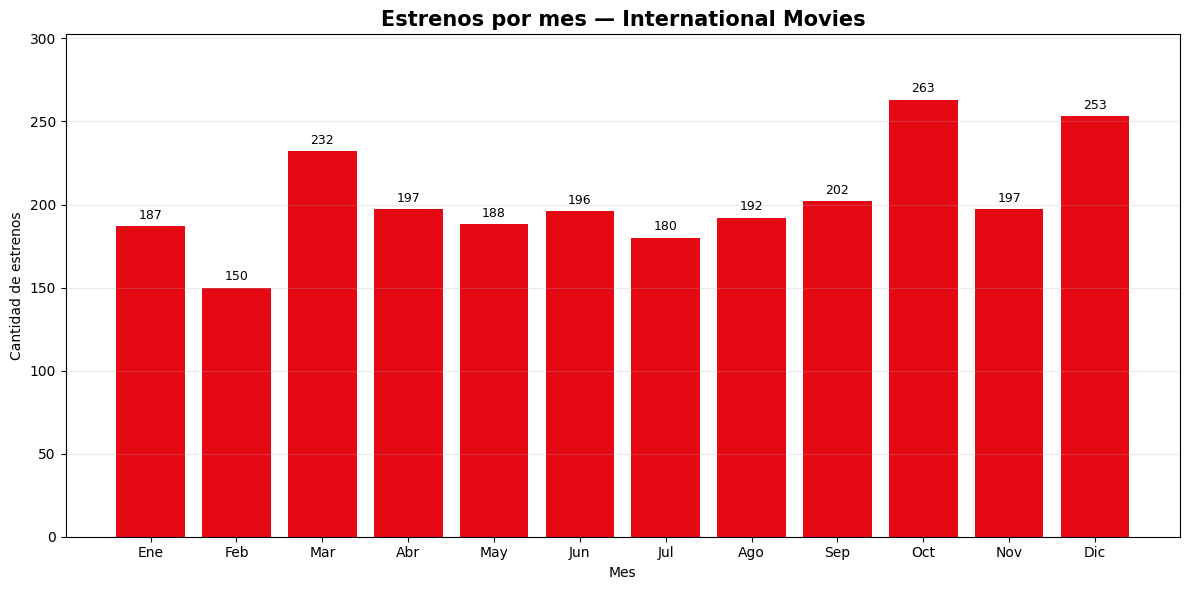

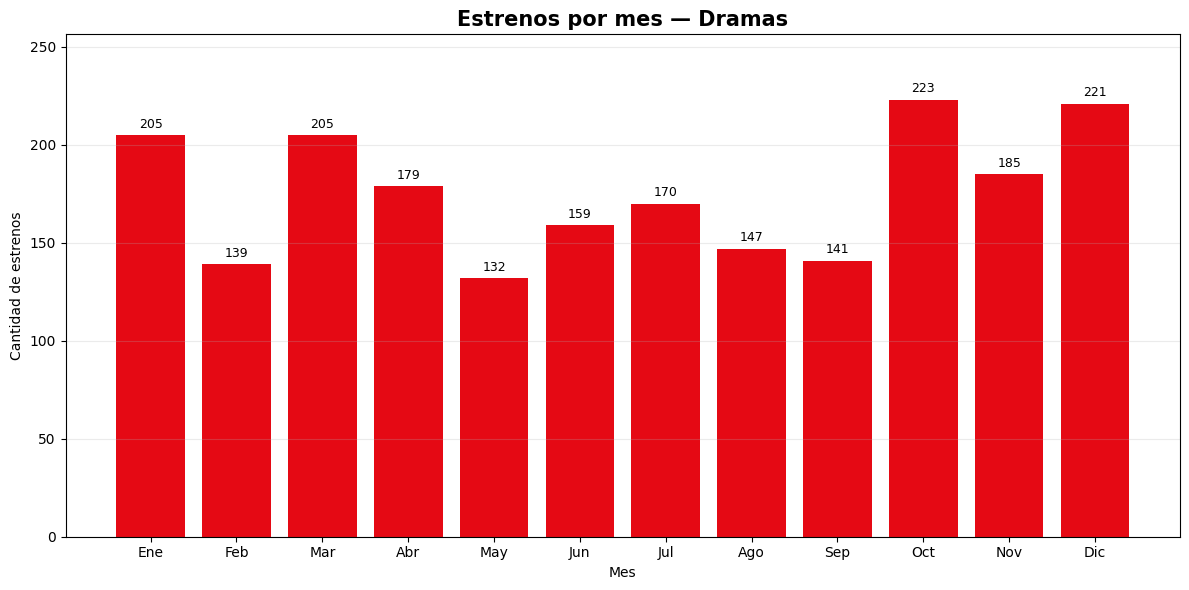

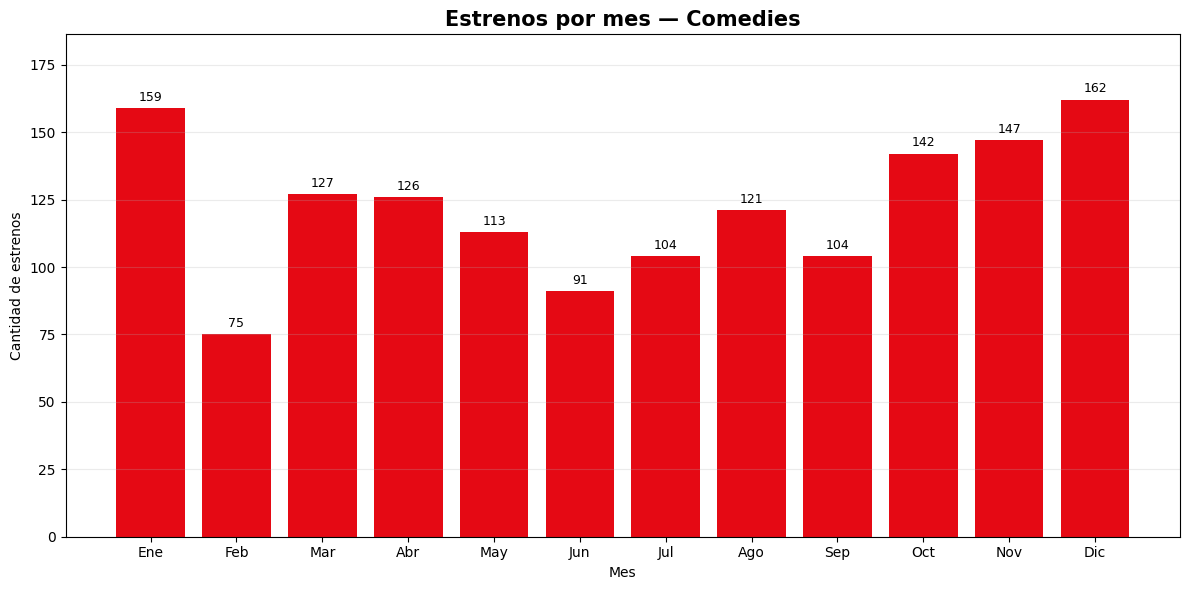

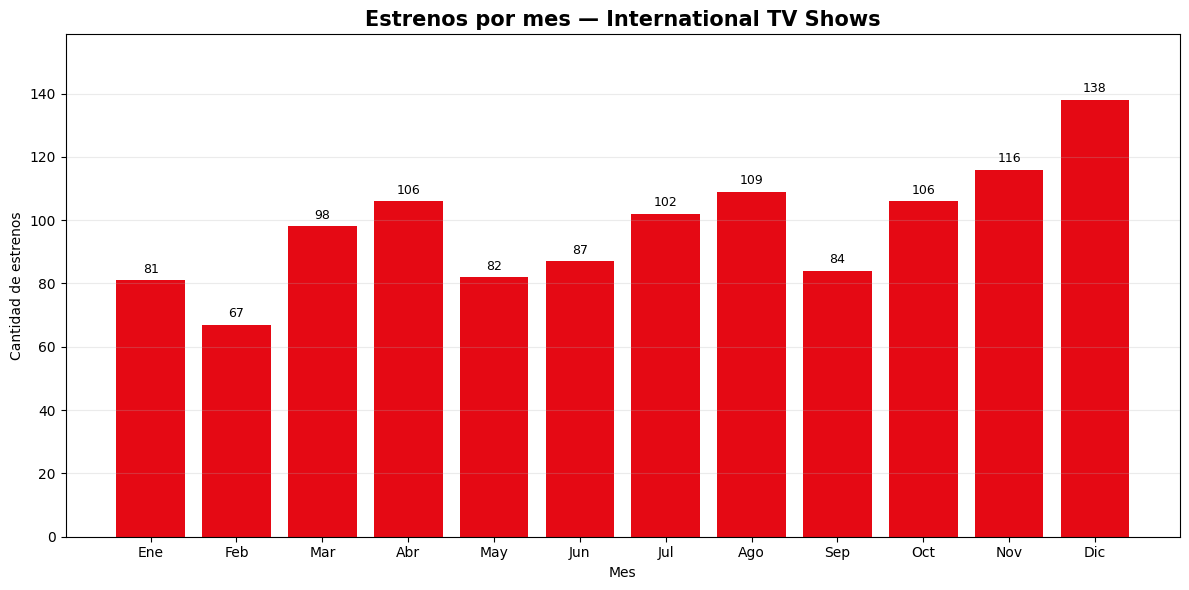

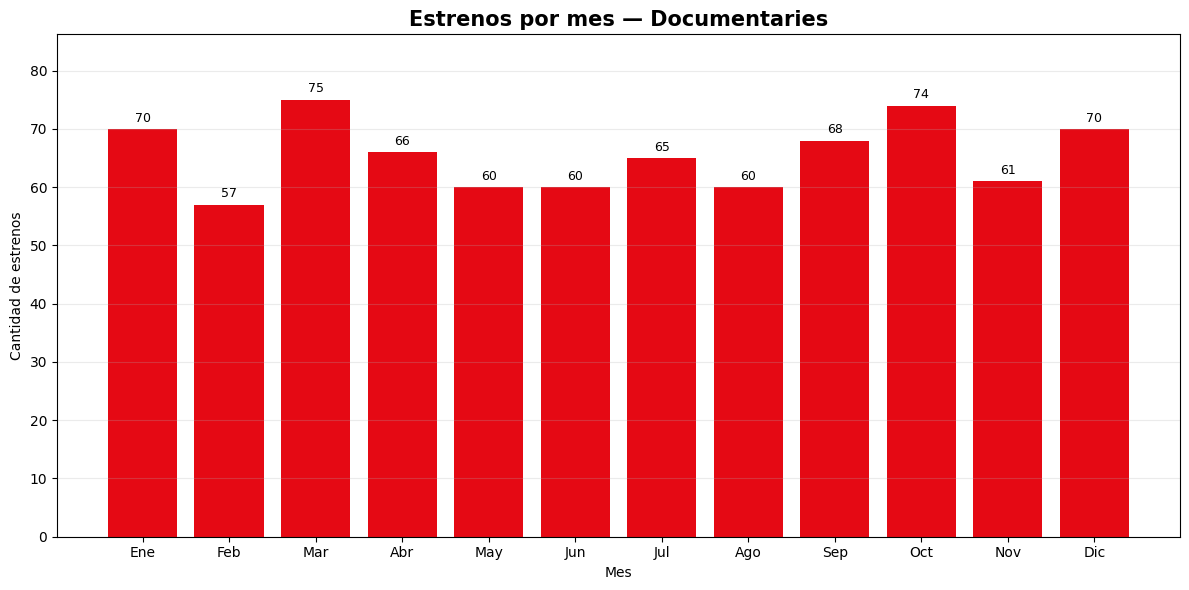

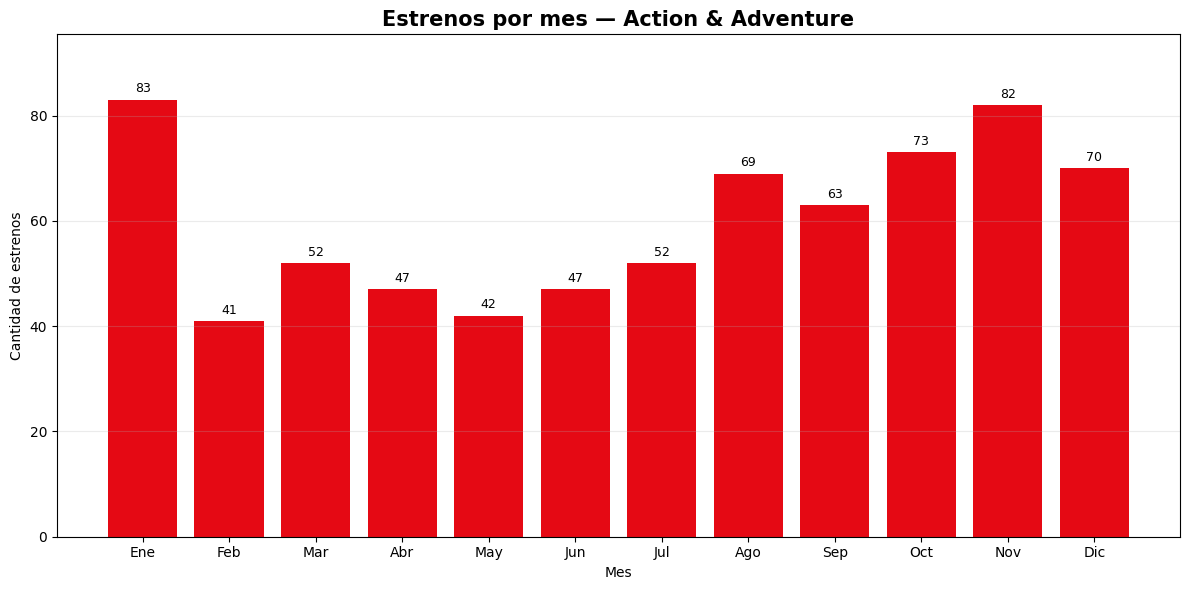

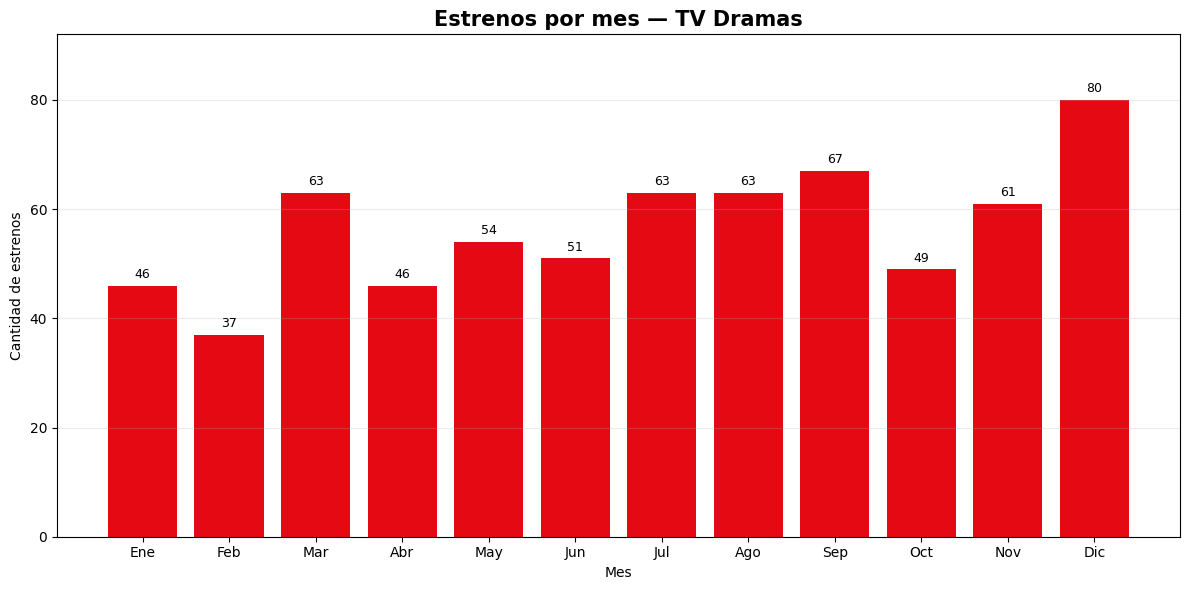

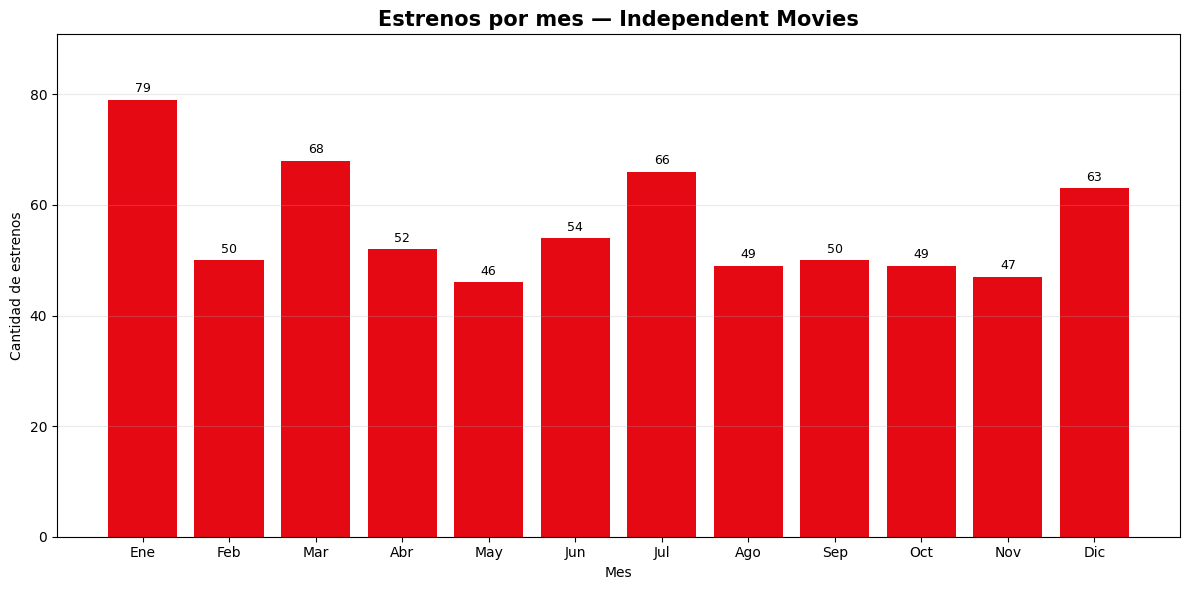

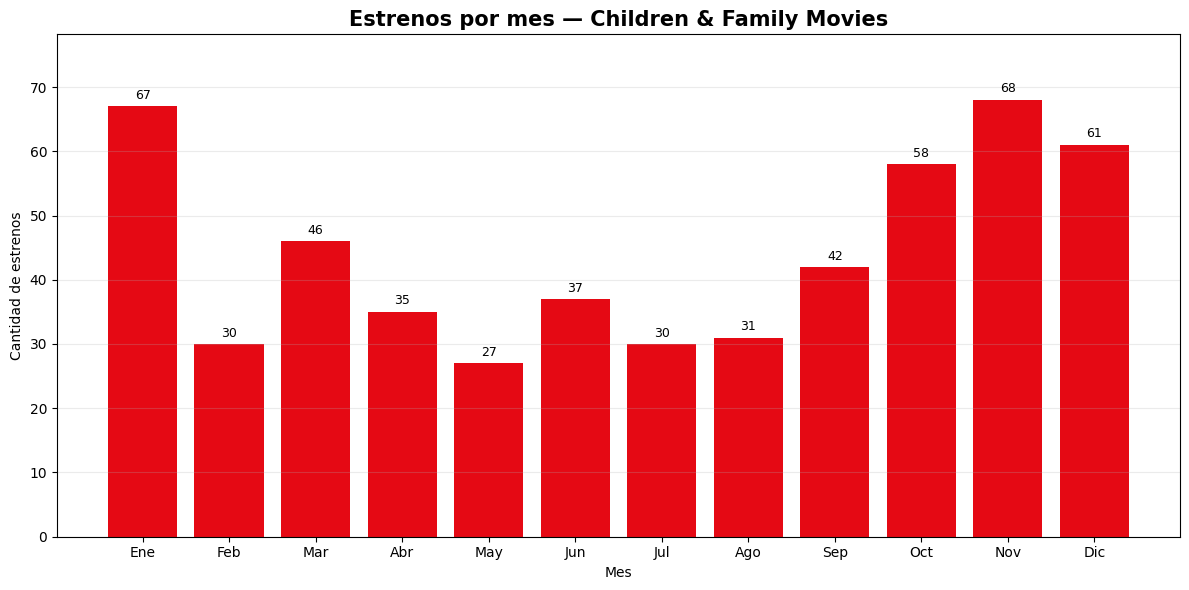

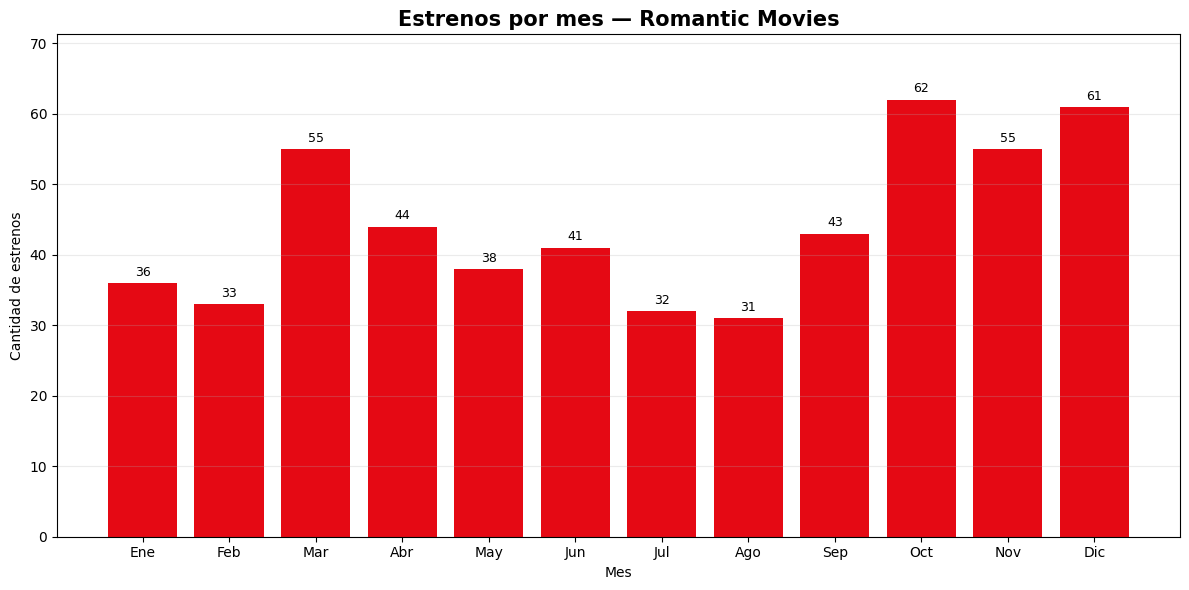

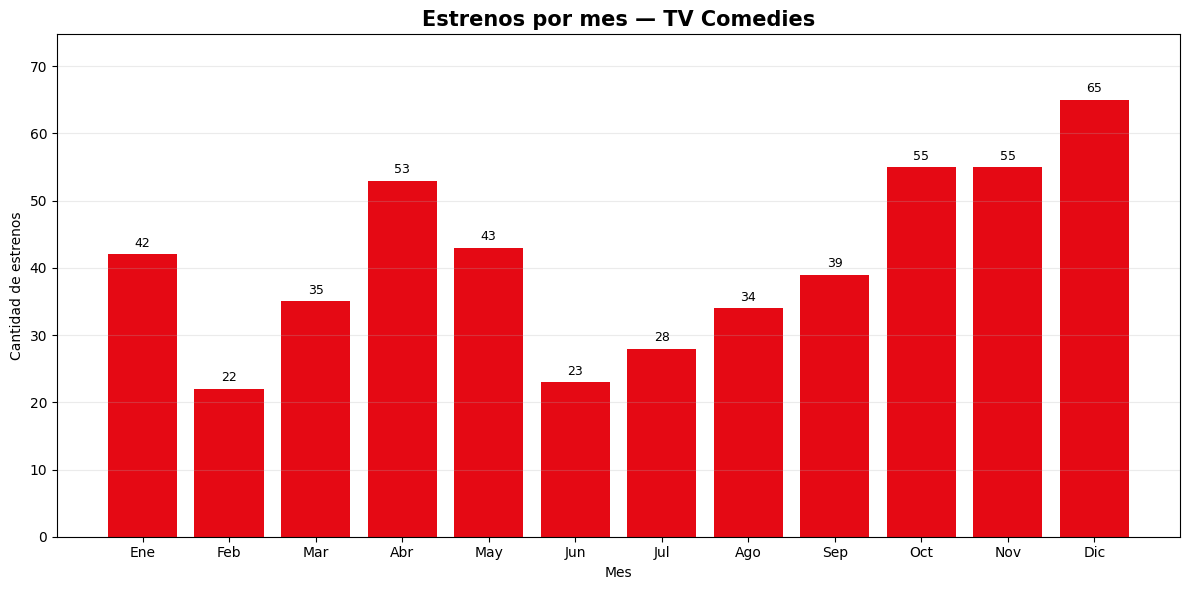

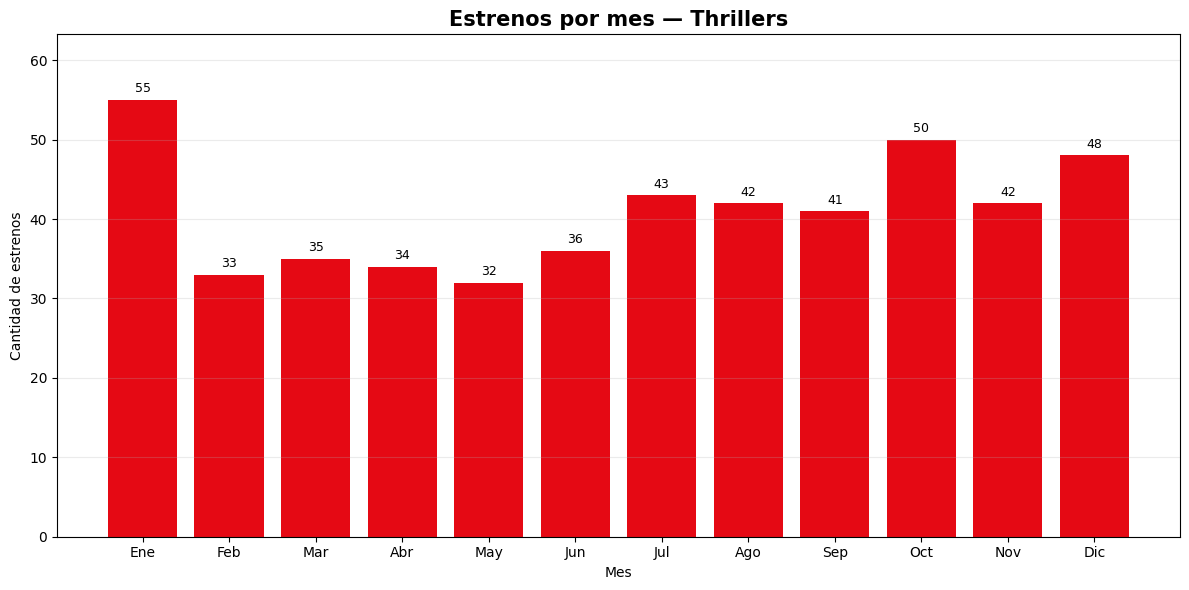

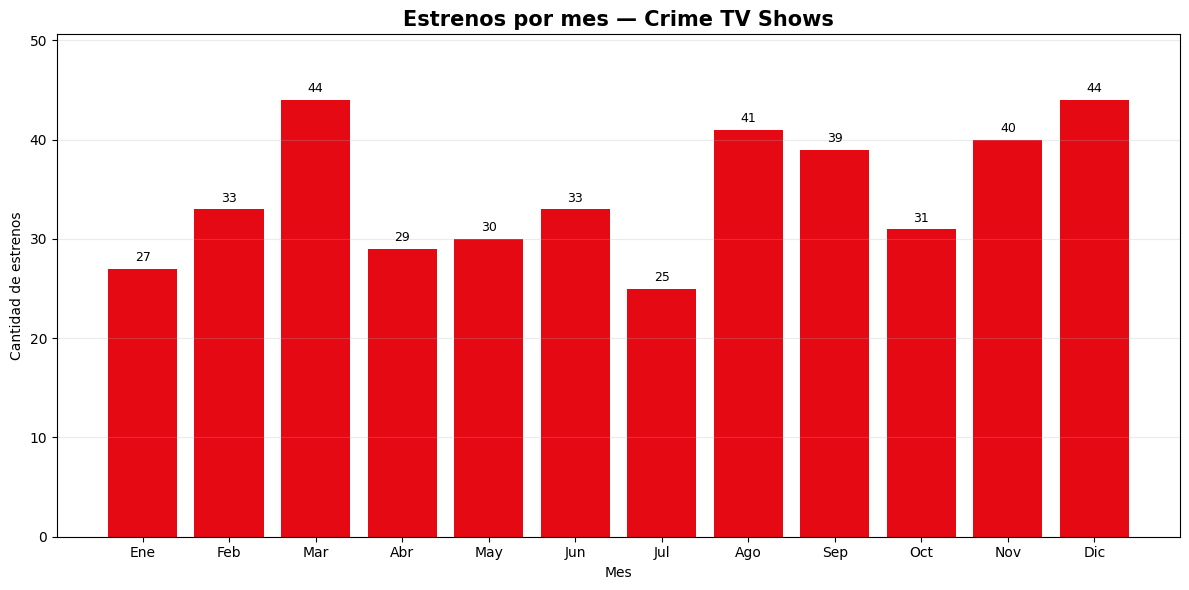

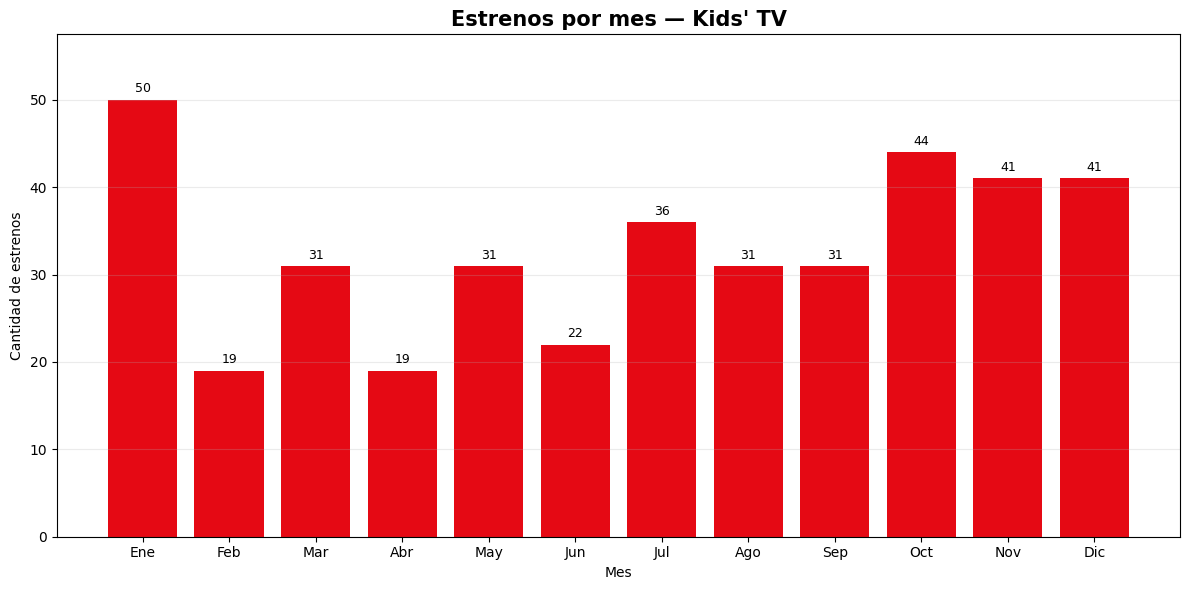

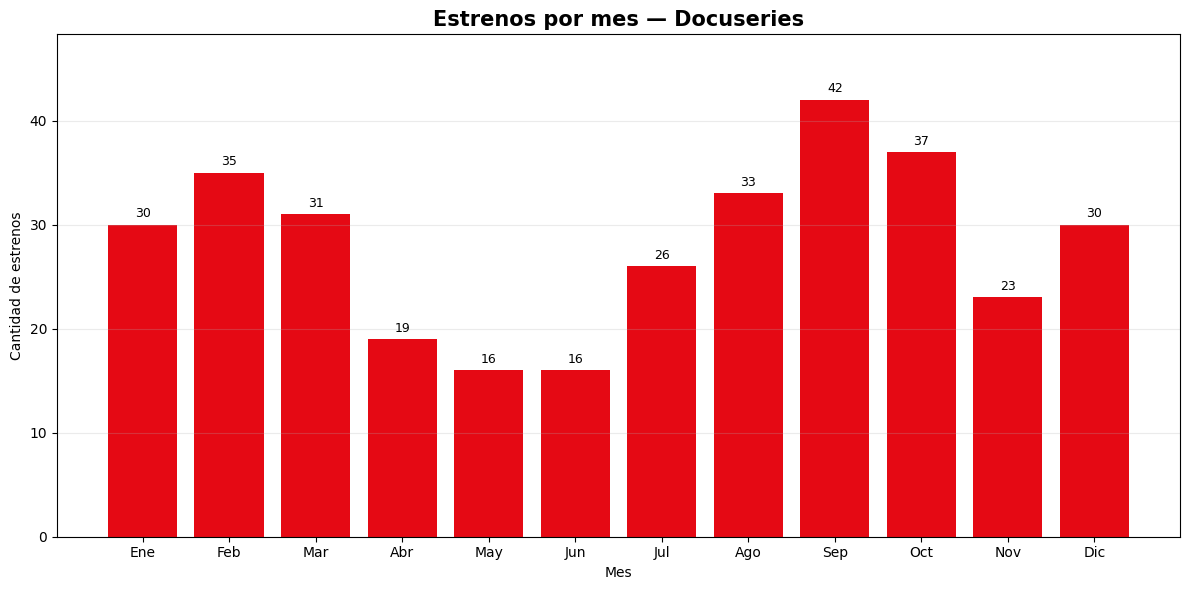

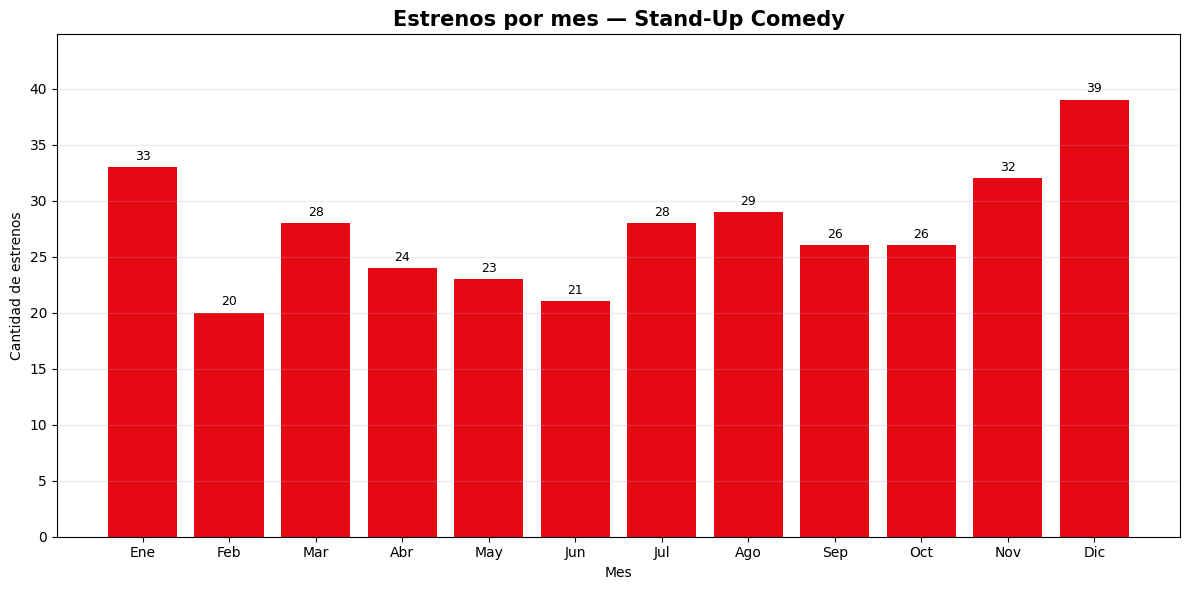

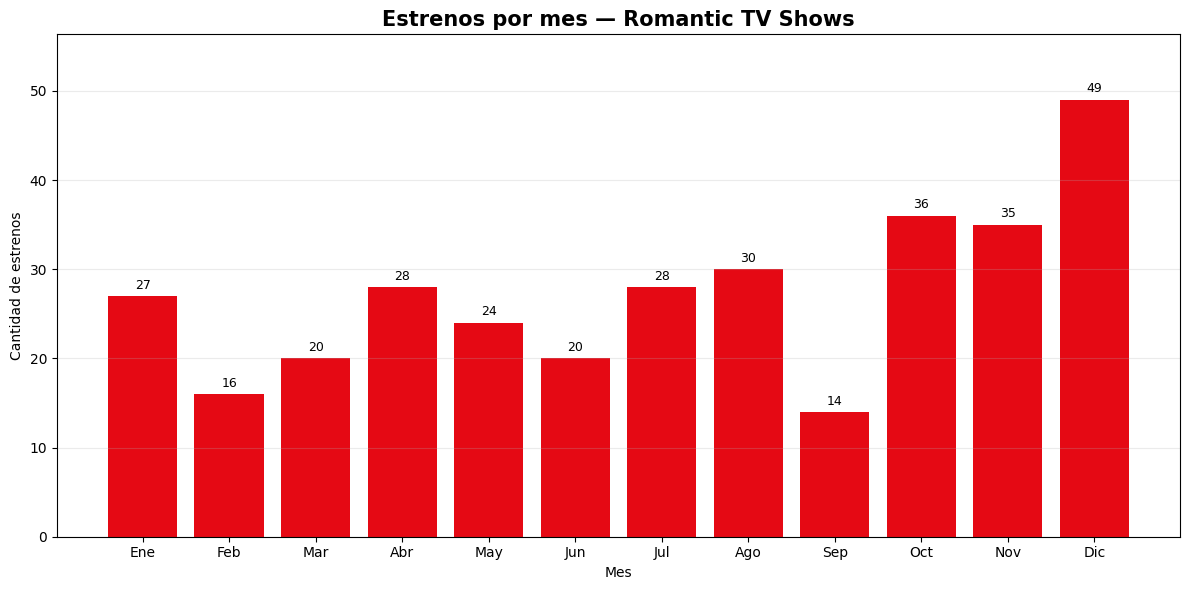

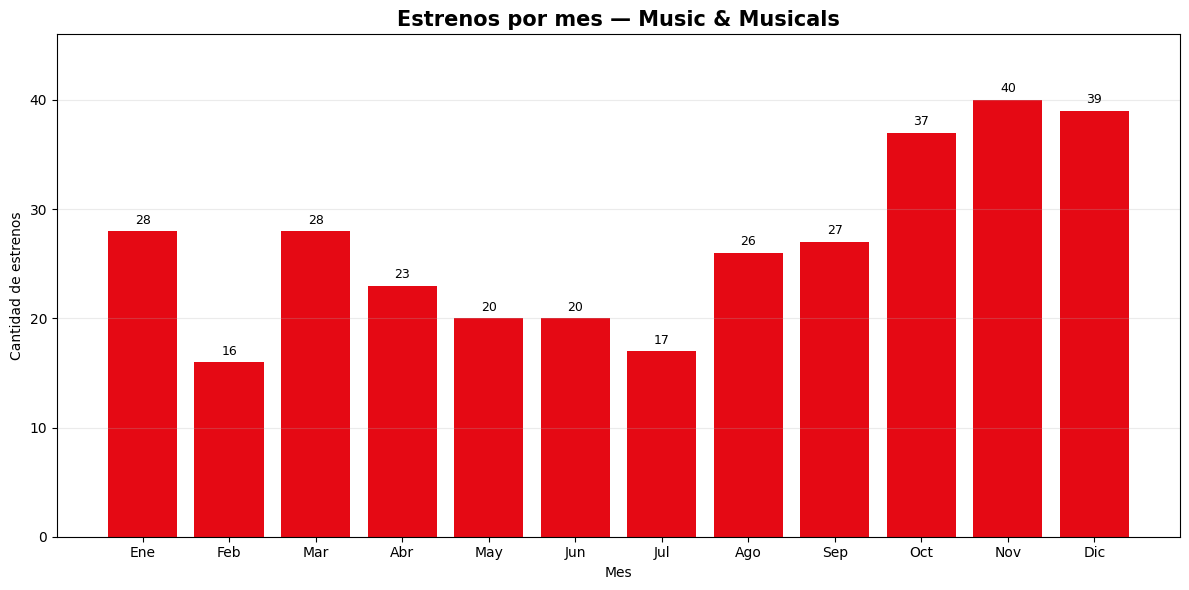

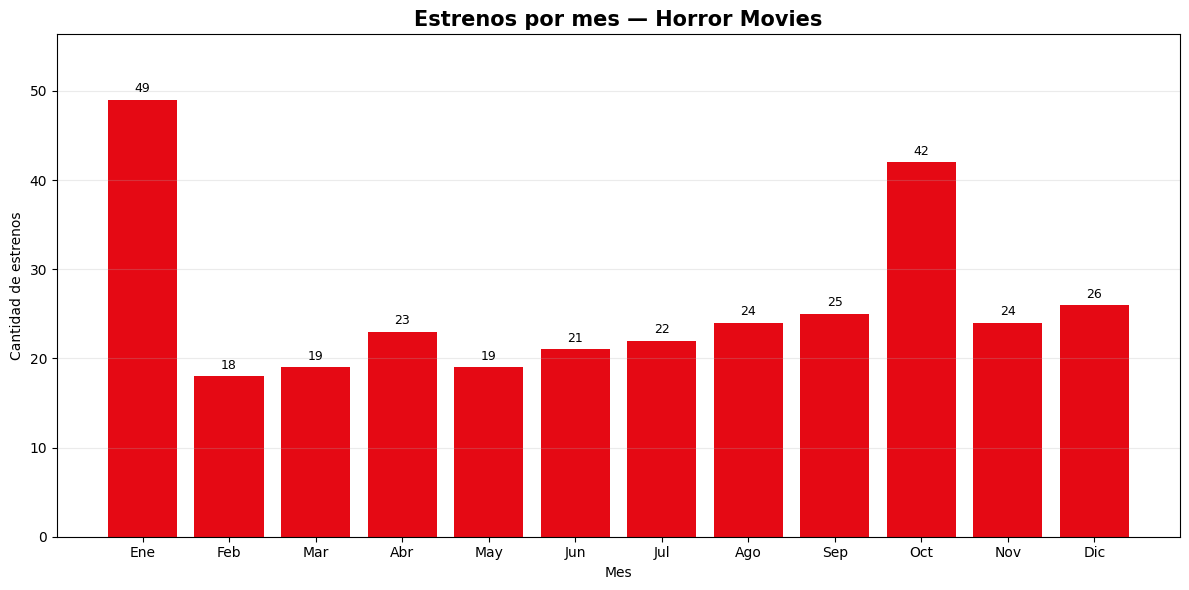

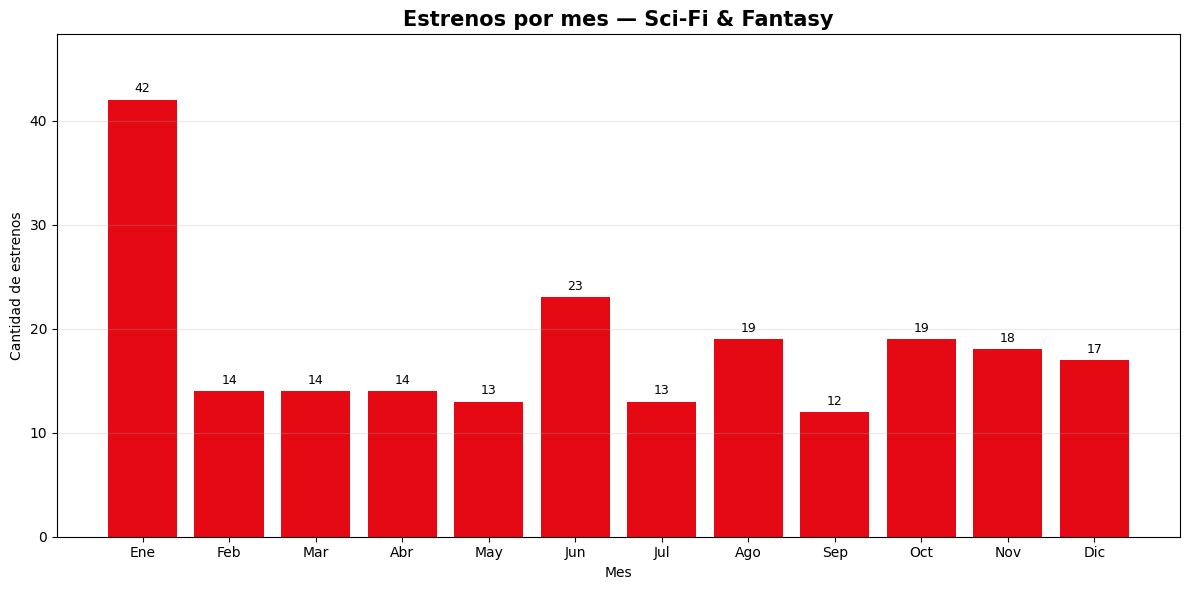

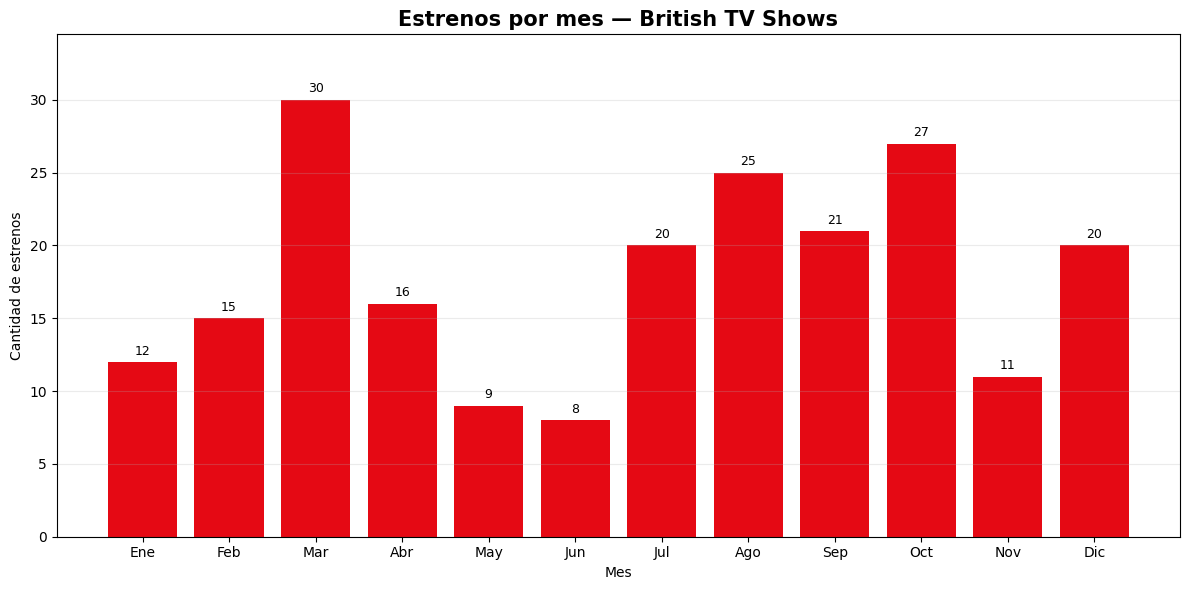

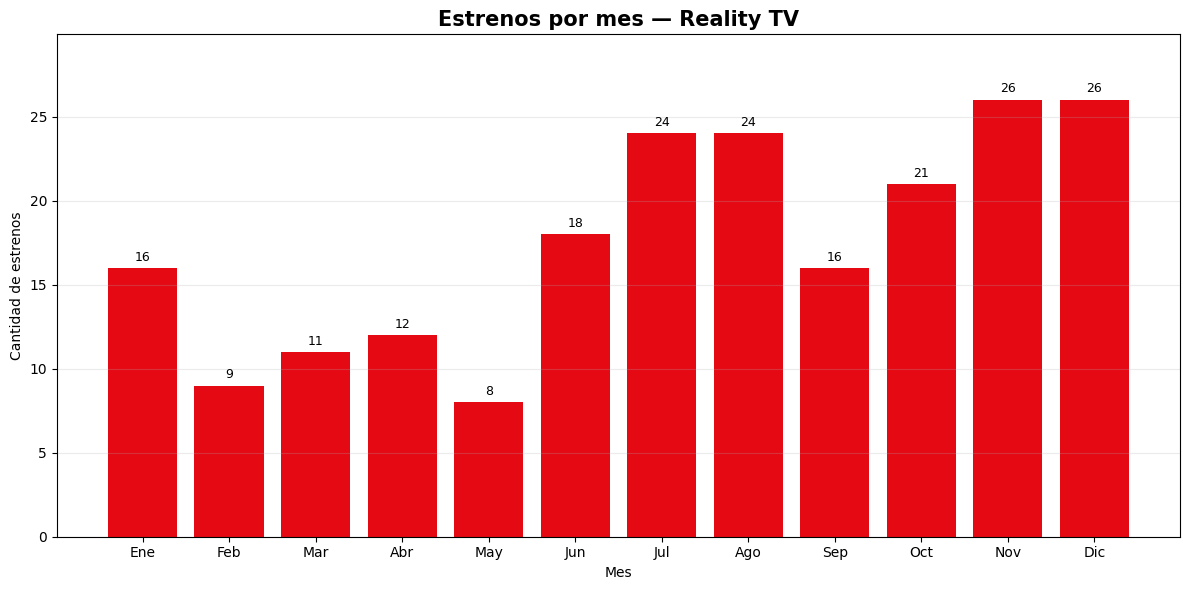

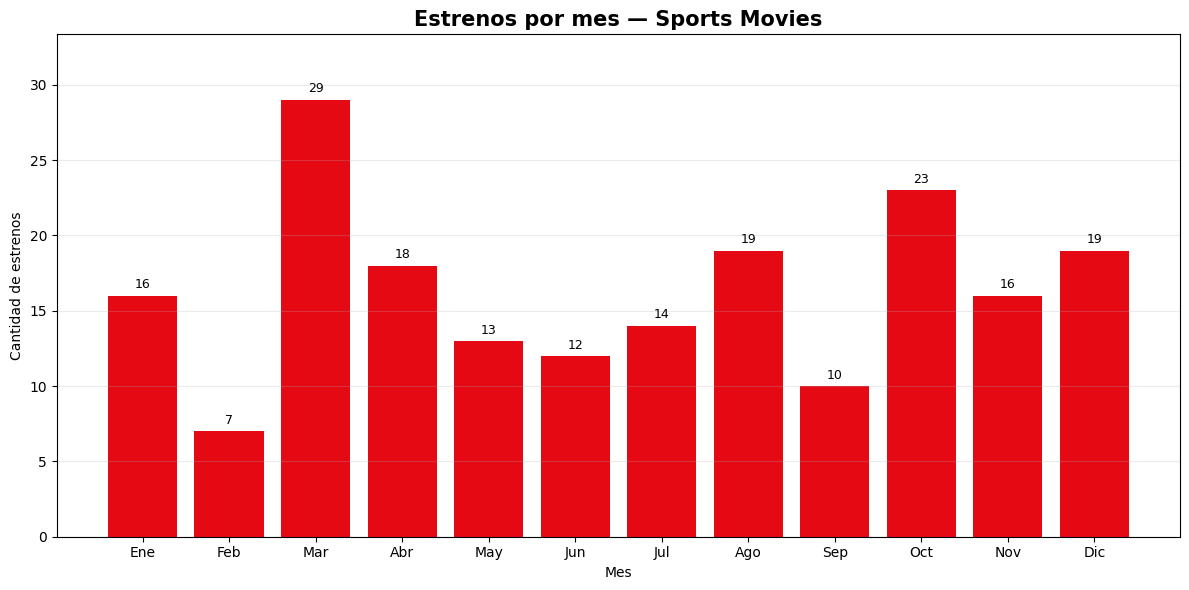

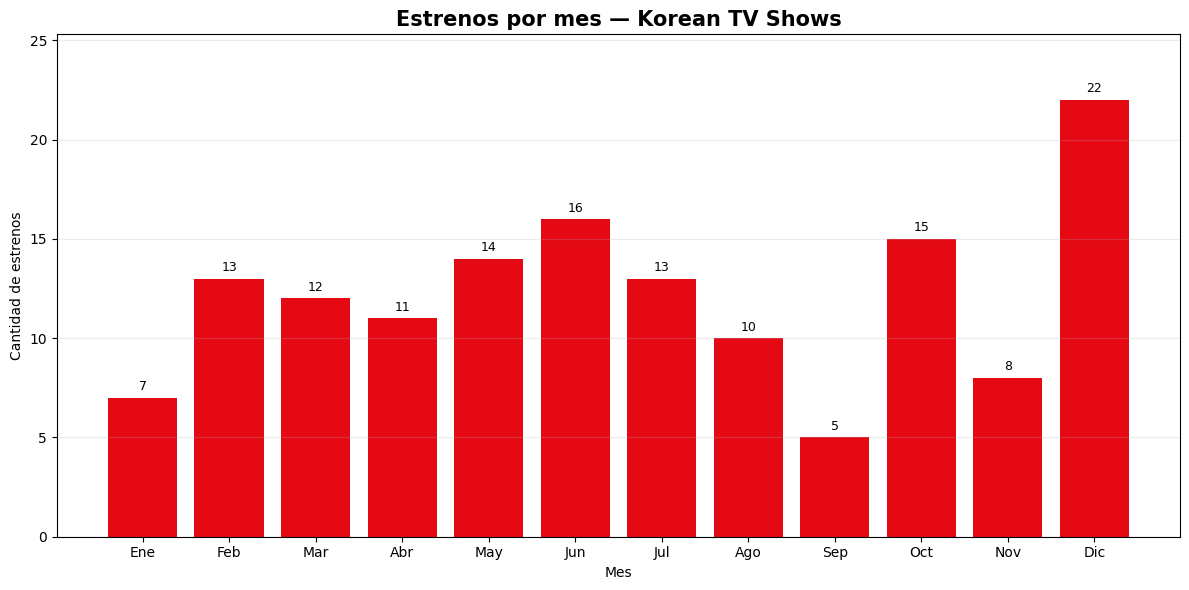

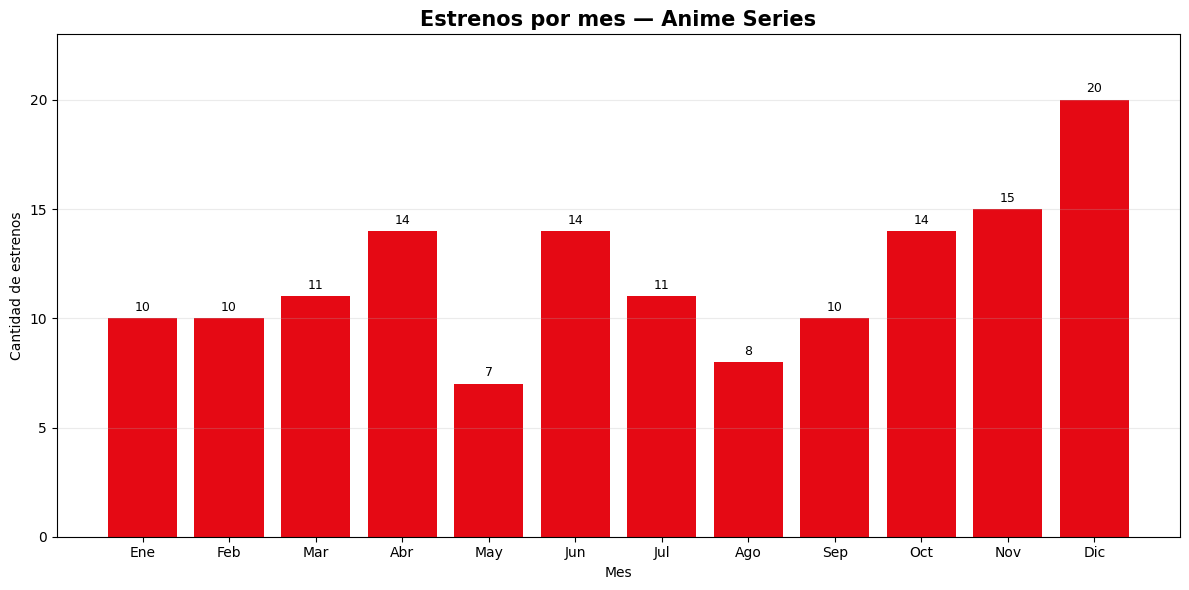

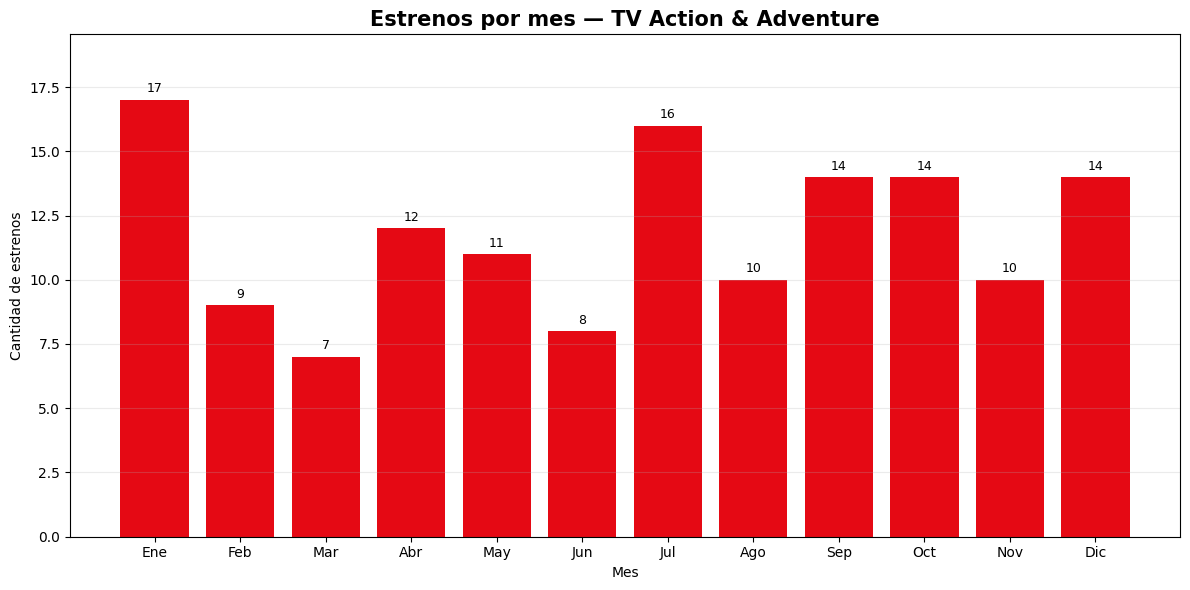

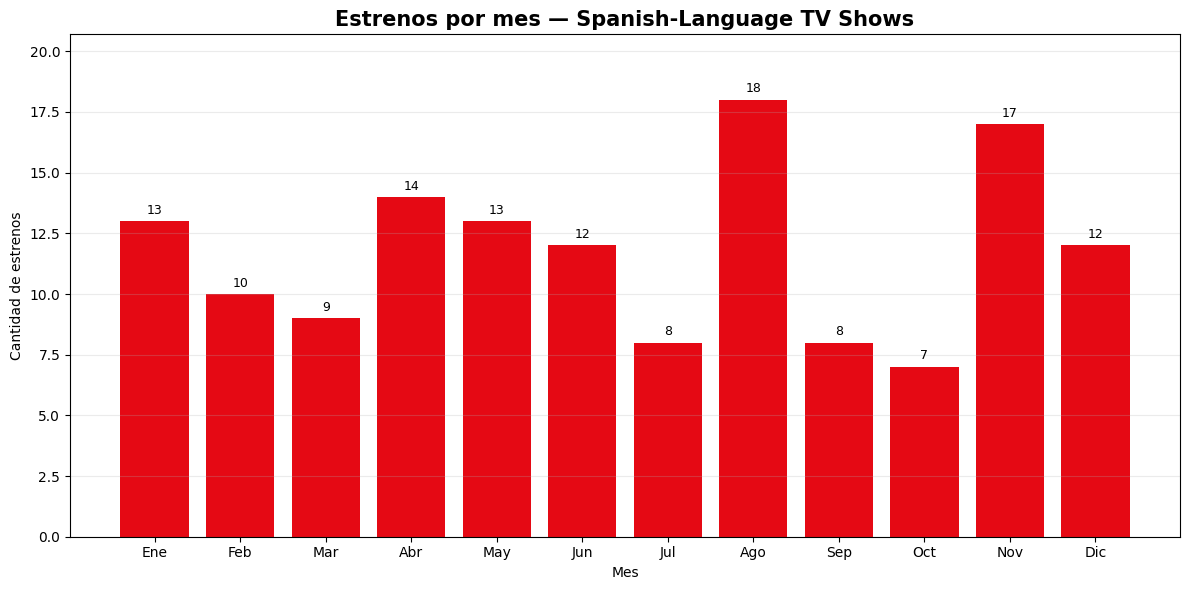

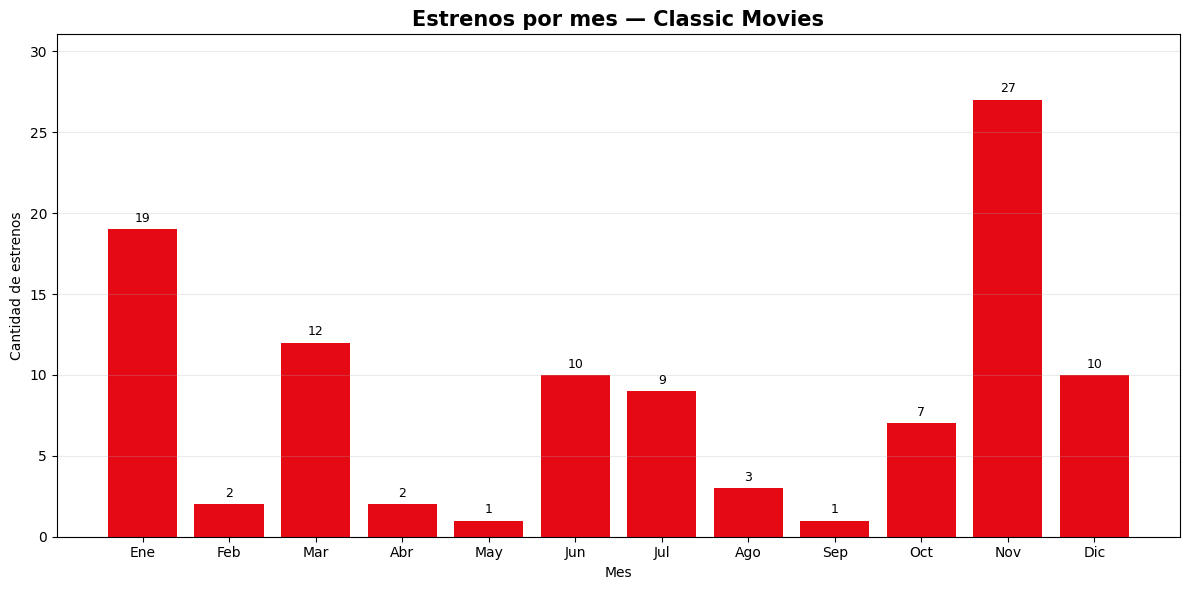

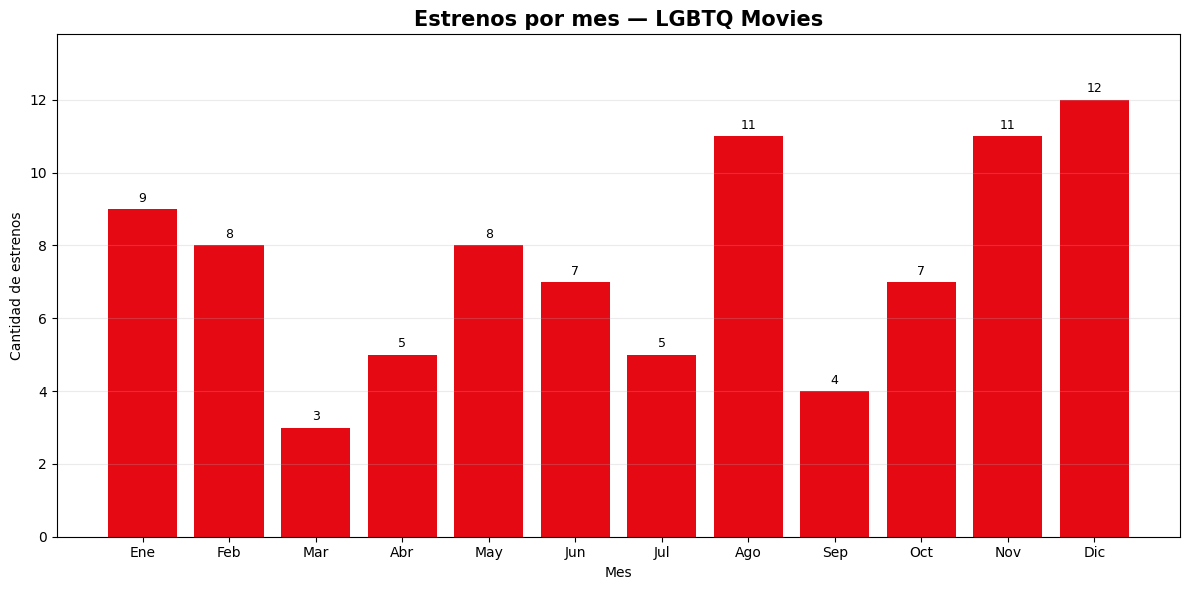

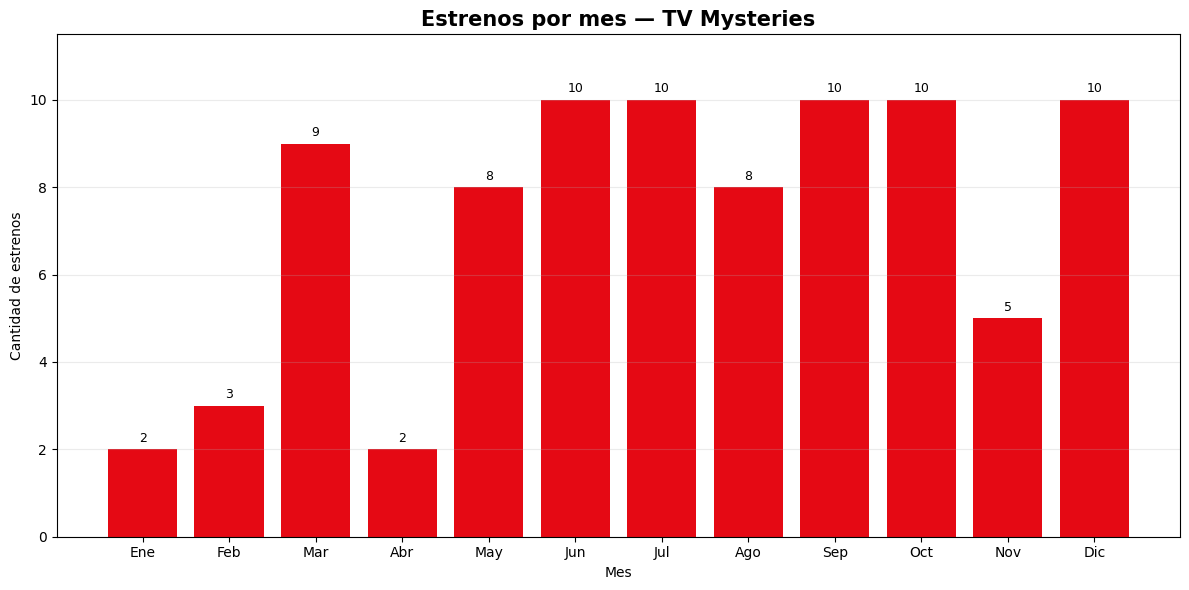

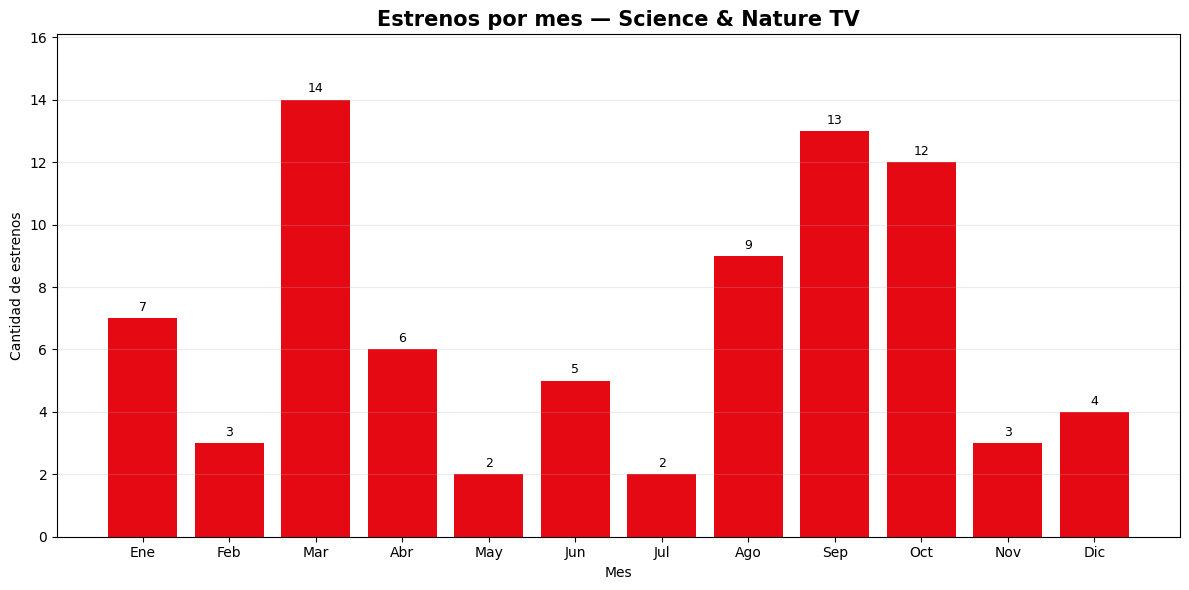

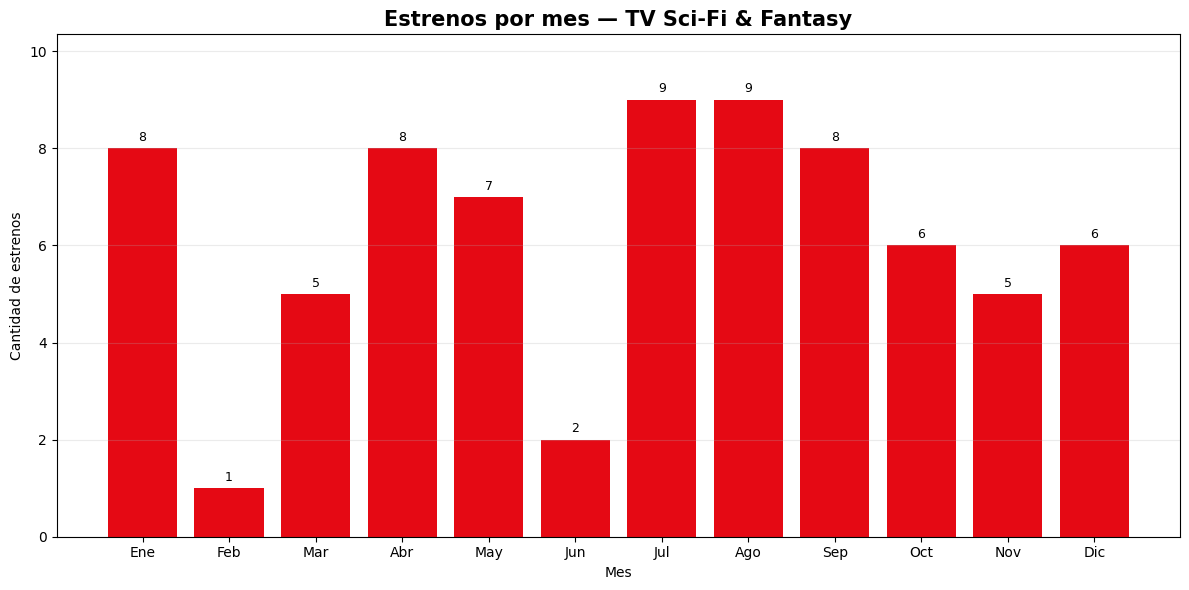

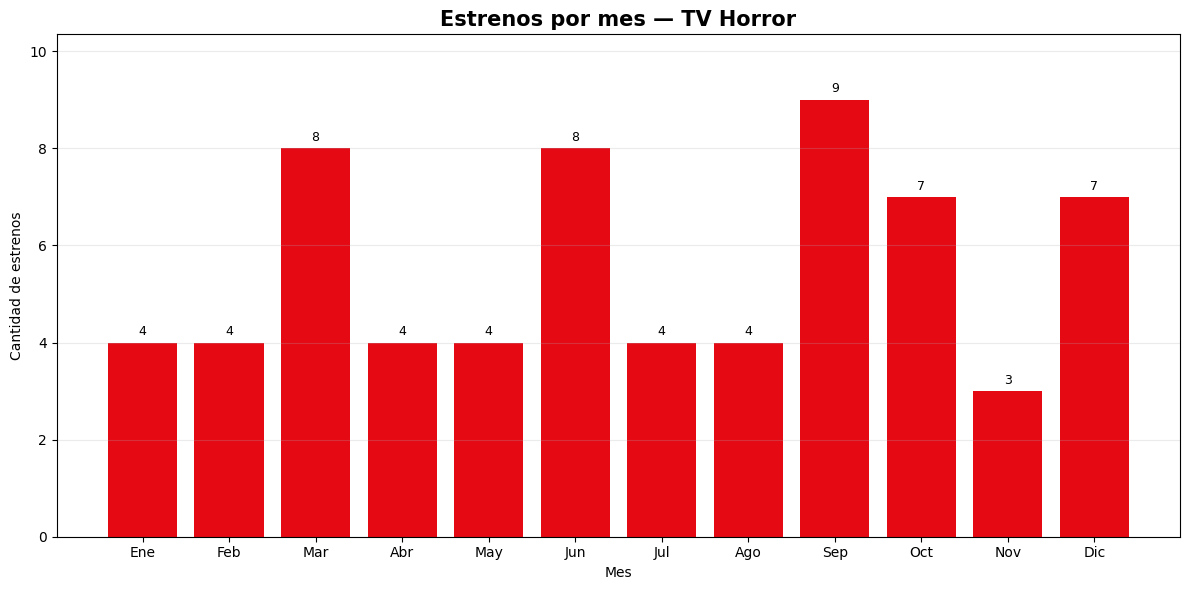

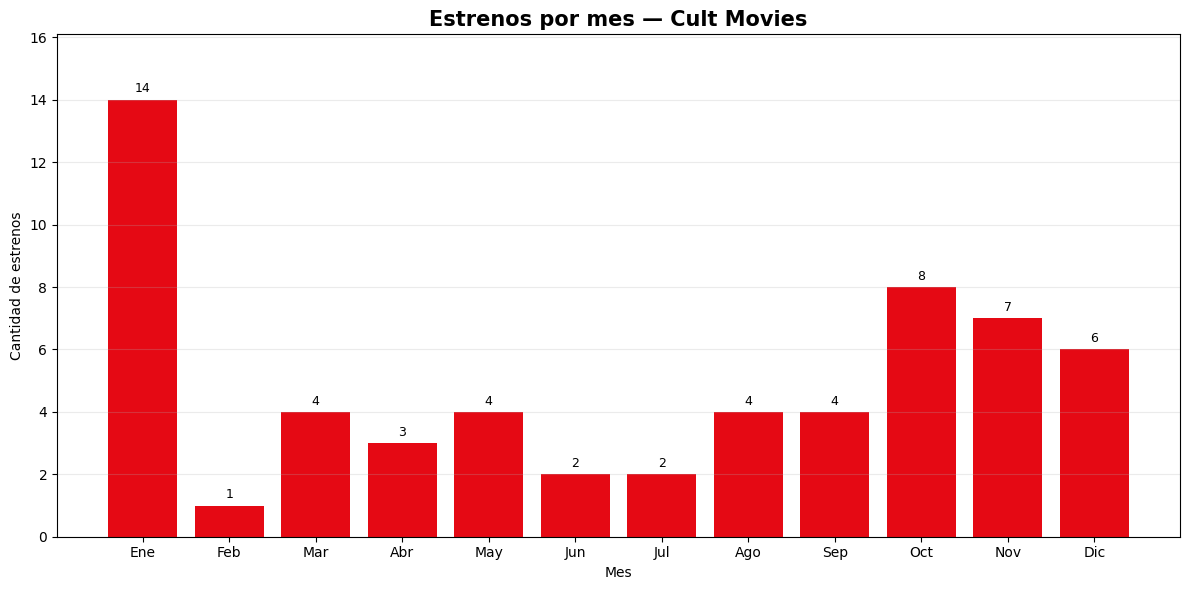

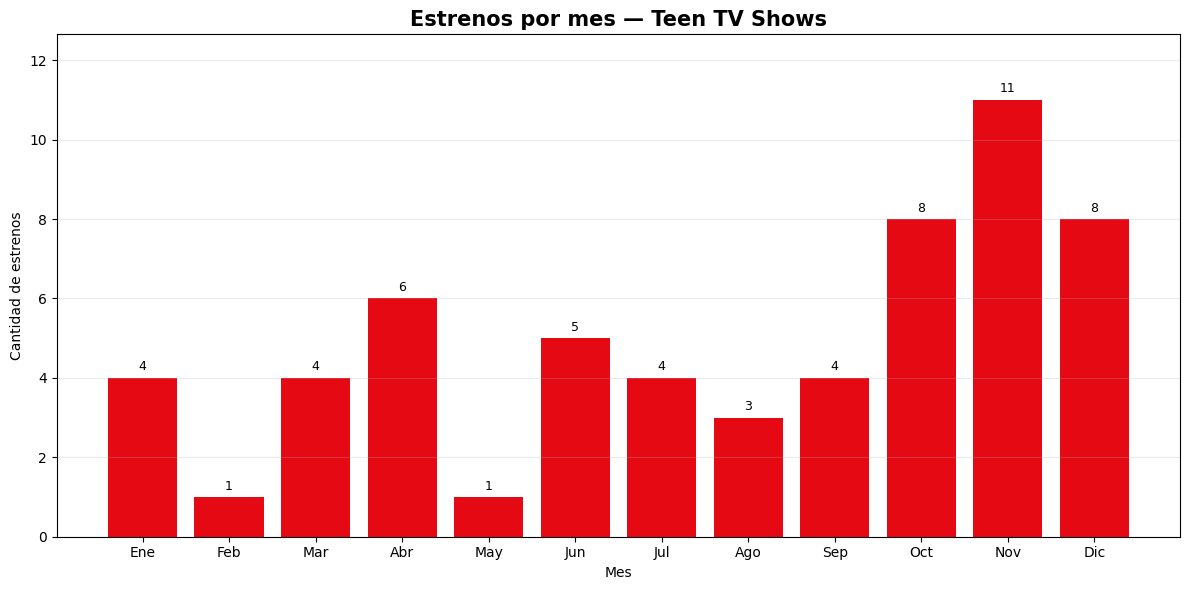

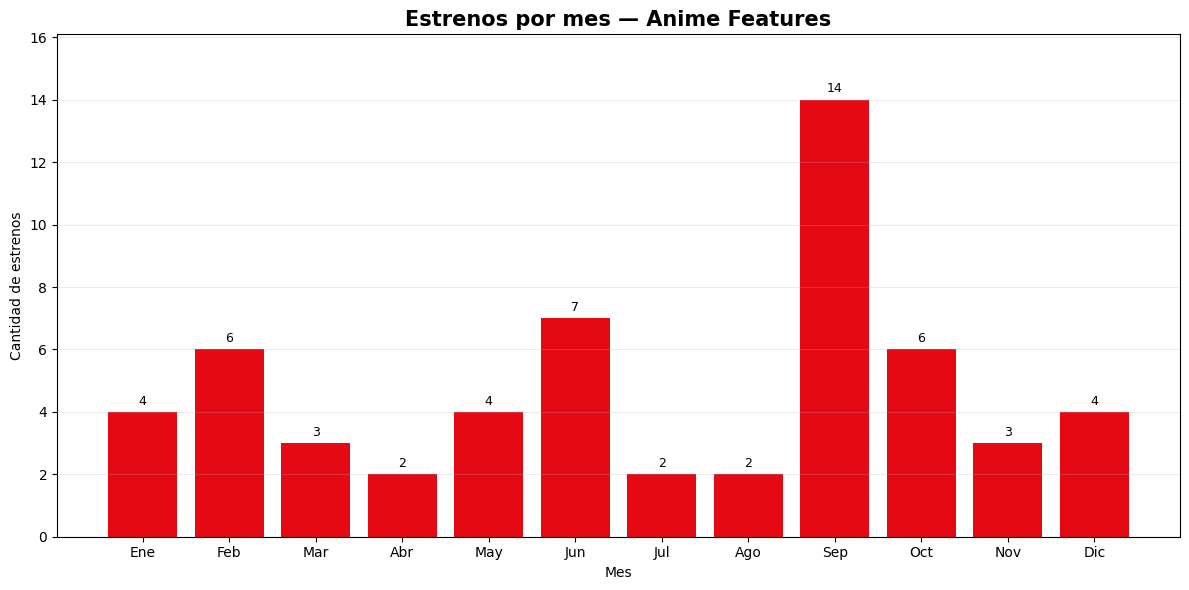

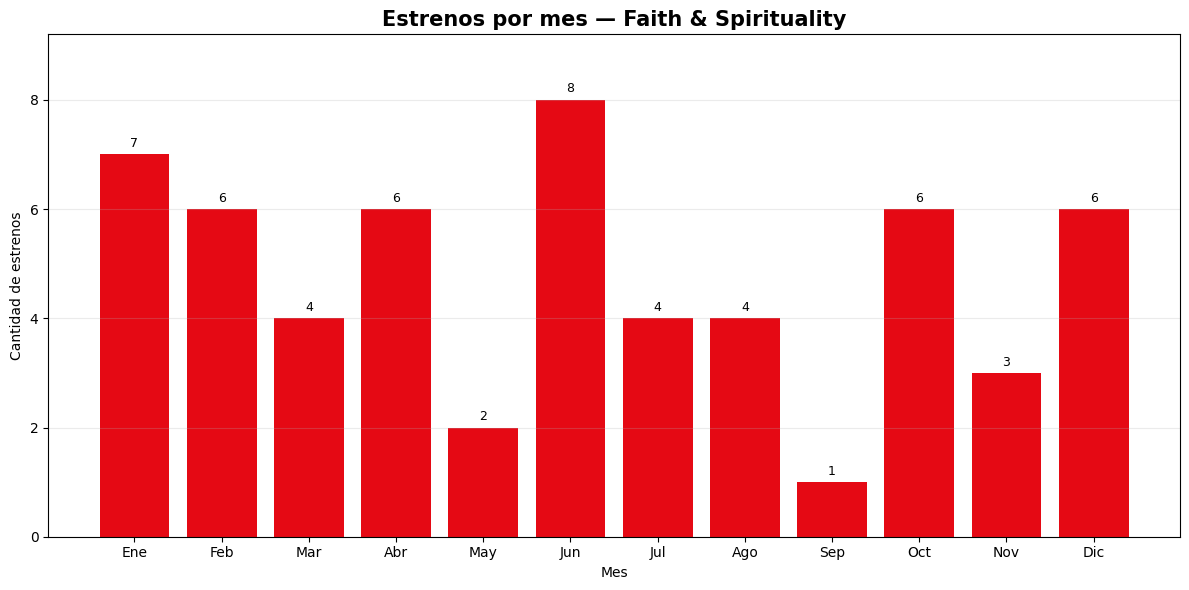

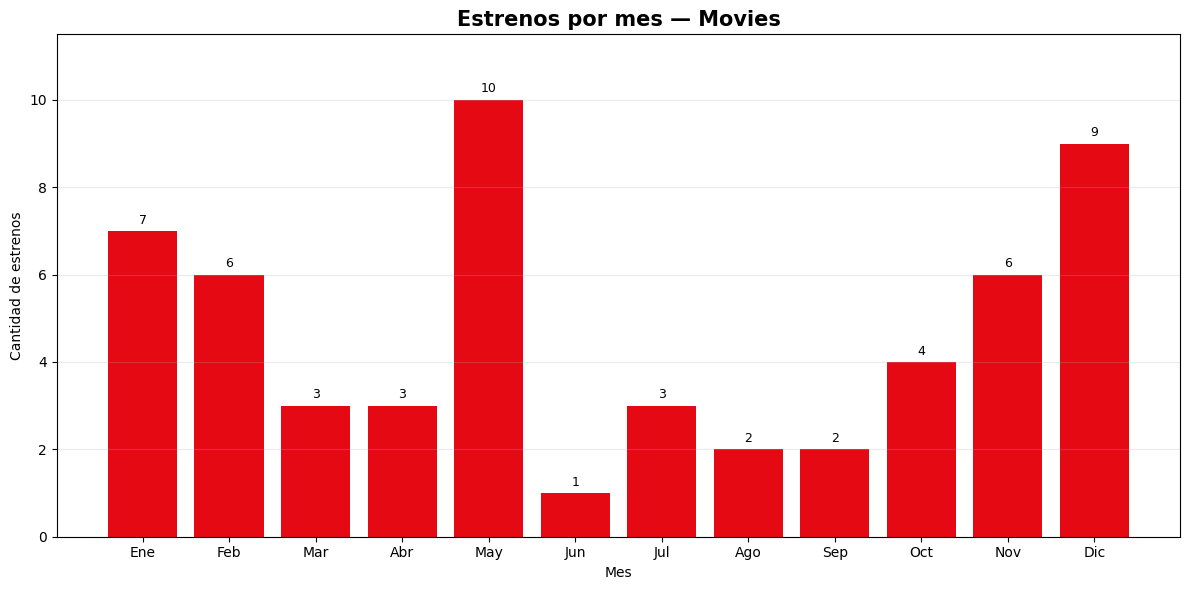

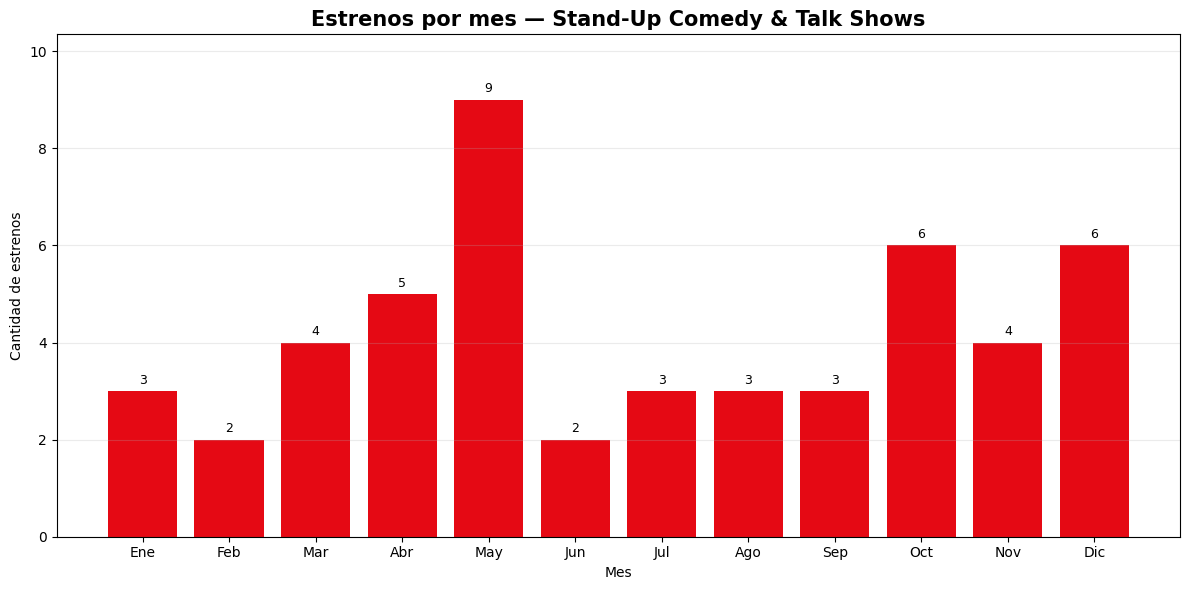

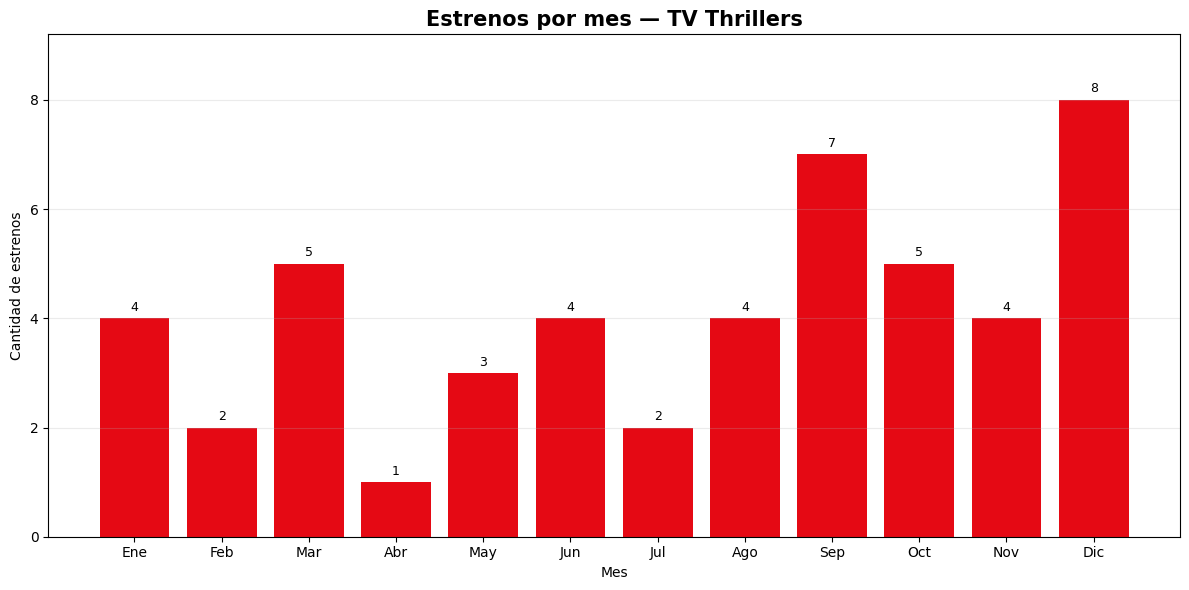

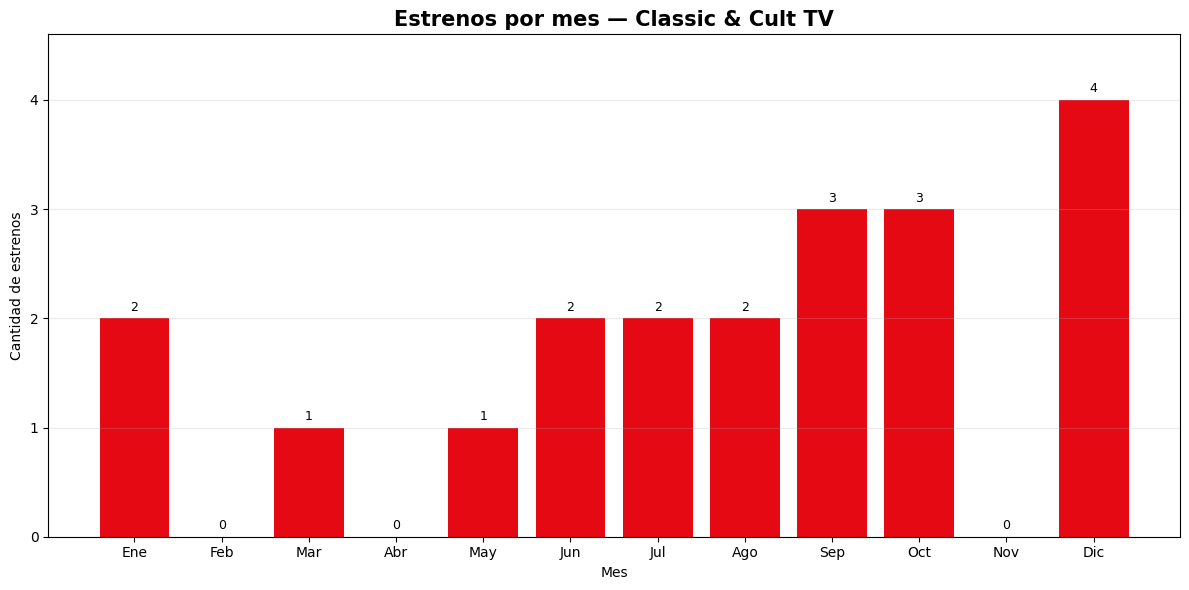

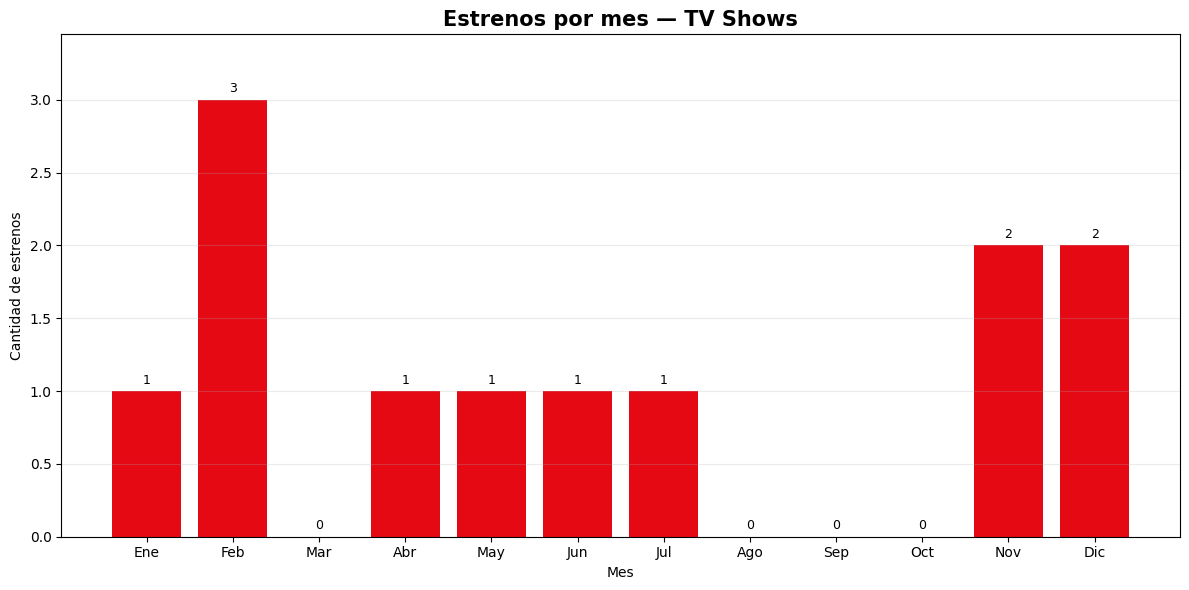

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"
BAR_COLOR = "#e50914"
MONTH_LABELS = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
TOP_N = None   # poné un entero (p.ej. 12) para graficar solo las top N categorías

# ============================
# Cargar y preparar datos
# ============================
df = pd.read_csv(INPUT_CSV)

# Fechas y mes
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added', 'listed_in'])
df['month'] = df['date_added'].dt.month

# Separar categorías múltiples y limpiar espacios
df['listed_in'] = df['listed_in'].astype(str).apply(lambda x: x.split(','))
df = df.explode('listed_in')
df['listed_in'] = df['listed_in'].str.strip()
df = df[df['listed_in'] != ""]  # quitar vacíos

# Conteo por categoría y mes
counts = (
    df.groupby(['listed_in', 'month'])
      .size()
      .reset_index(name='count')
)

# Orden de categorías por total descendente (para elegir top N si se desea)
cat_order = (
    counts.groupby('listed_in')['count']
          .sum()
          .sort_values(ascending=False)
          .index
)

if TOP_N is not None:
    cat_order = cat_order[:TOP_N]

counts = counts[counts['listed_in'].isin(cat_order)]

# ============================
# Graficar: una figura por categoría
# ============================
for cat in cat_order:
    data = counts[counts['listed_in'] == cat].set_index('month')['count']
    # asegurar los 12 meses en orden
    data = data.reindex(range(1,13), fill_value=0)

    plt.figure(figsize=(12,6))
    bars = plt.bar(range(1,13), data.values, color=BAR_COLOR)

    # etiquetas de valores sobre cada barra
    for b, val in zip(bars, data.values):
        plt.text(b.get_x() + b.get_width()/2, b.get_height() + max(data.values)*0.01,
                 f"{int(val)}", ha='center', va='bottom', fontsize=9)

    plt.title(f"Estrenos por mes — {cat}", fontsize=15, weight="bold")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de estrenos")
    plt.xticks(range(1,13), MONTH_LABELS)
    plt.ylim(0, max(data.values)*1.15 if data.values.max() > 0 else 1)
    plt.grid(axis='y', alpha=0.25)
    plt.tight_layout()
    plt.show()



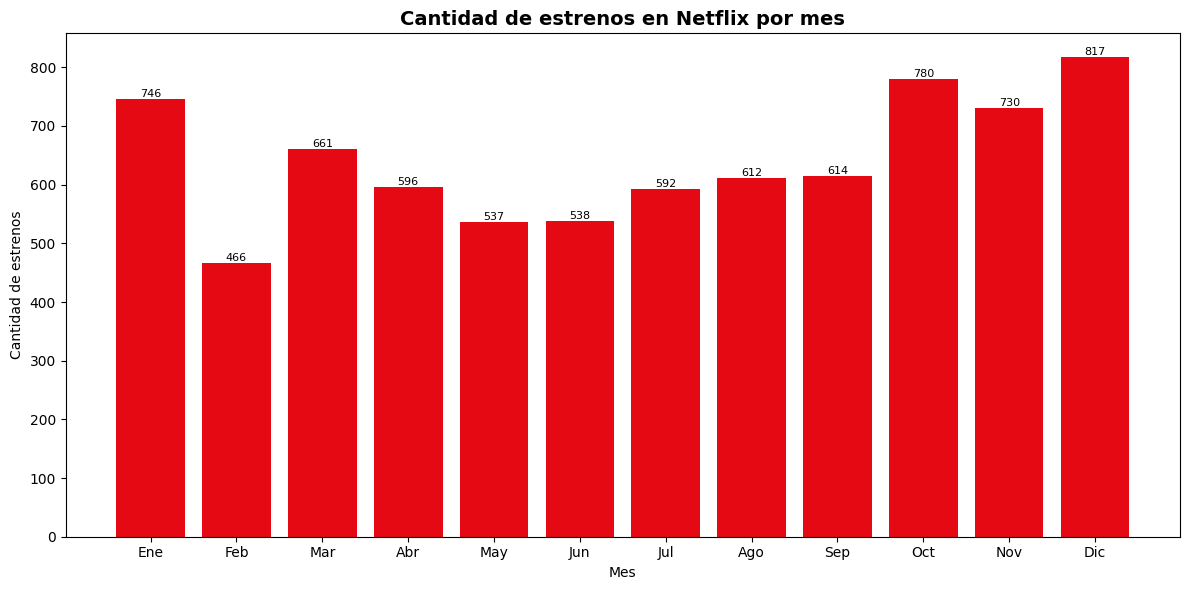

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"
PALETTE = ['#e50914', '#221f1f', '#b20710']

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer mes
df['month_added'] = df['date_added'].dt.month

# ============================
# Conteo por mes
# ============================
monthly_counts = (
    df.groupby('month_added')
      .size()
      .reset_index(name='count')
)

# ============================
# Visualización
# ============================
plt.figure(figsize=(12,6))
bars = plt.bar(monthly_counts['month_added'], monthly_counts['count'], color=PALETTE[0])

plt.title("Cantidad de estrenos en Netflix por mes", fontsize=14, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Cantidad de estrenos")
plt.xticks(range(1,13), 
           ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])

# Mostrar los valores arriba de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Pregunta 7

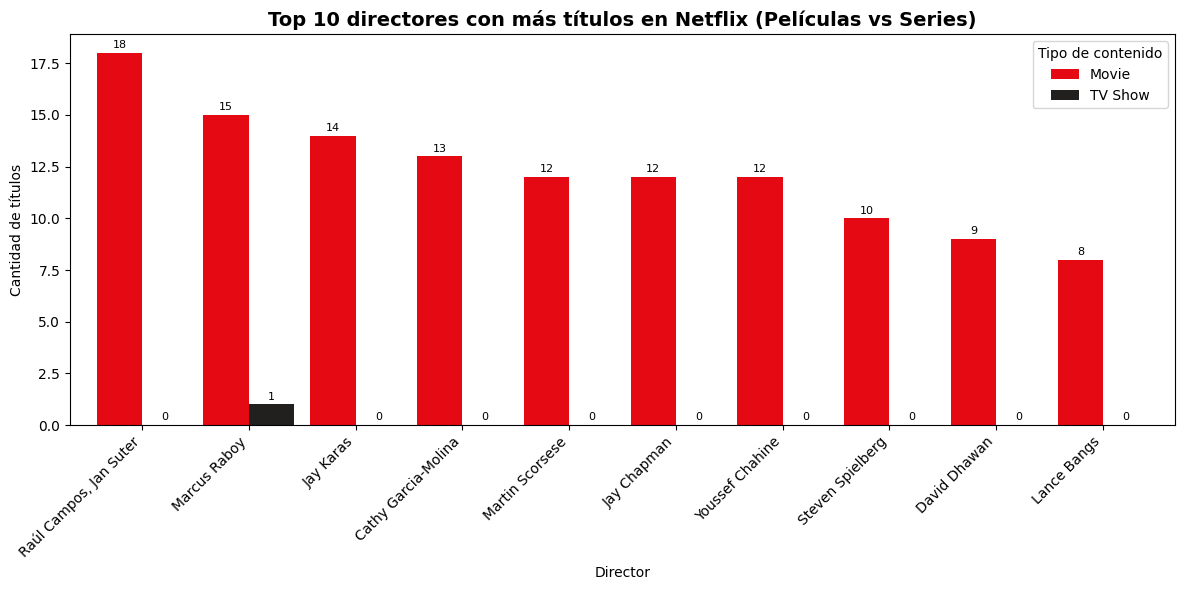

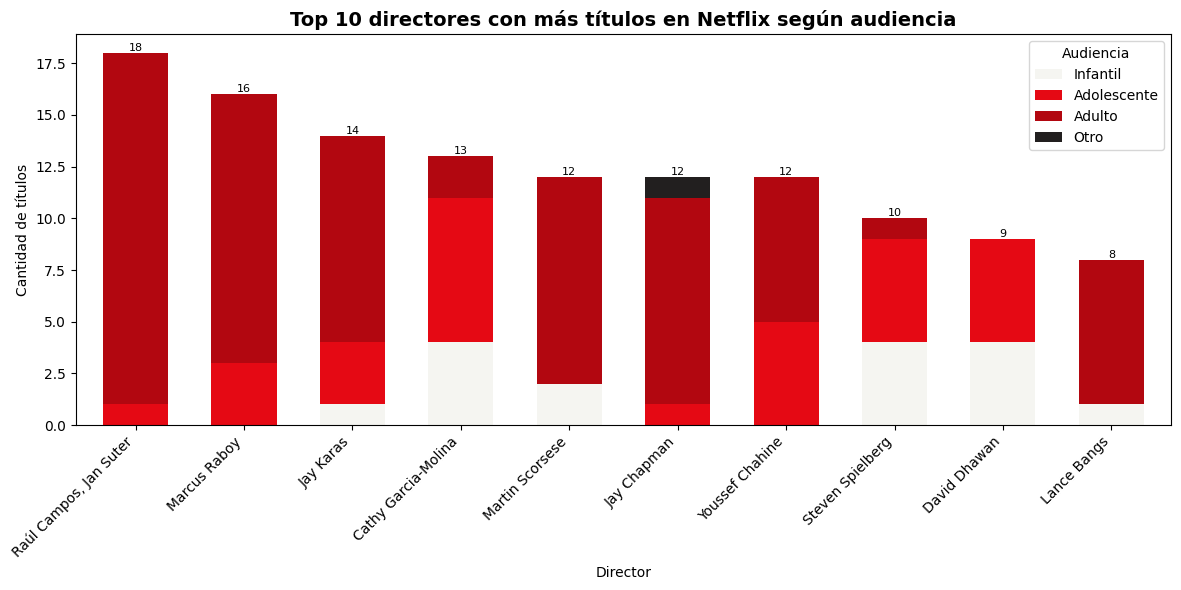

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# Configuración
# ============================
INPUT_CSV = "netflix.csv"
PALETTE_TYPE = ['#e50914', '#221f1f']  # Películas / Series
PALETTE_AUD  = ['#f5f5f1', '#e50914', '#b20710', '#221f1f']  # Infantil / Adolescente / Adulto / Otro

# ============================
# Cargar dataset
# ============================
df = pd.read_csv(INPUT_CSV)

# Eliminar nulos en directores
df = df.dropna(subset=['director'])

# ============================
# Conteo de títulos por director
# ============================
director_counts = (
    df.groupby('director')
      .size()
      .reset_index(name='count')
      .sort_values(by='count', ascending=False)
)

# Top 10 directores y orden único para ambas gráficas
top_directors = director_counts.head(10)['director'].tolist()

# Filtrar solo esos directores
df_top = df[df['director'].isin(top_directors)].copy()

# ============================
# Gráfico 1: títulos por tipo (Movie / TV Show)
# ============================
pivot_type = (
    df_top.groupby(['director', 'type'])
          .size()
          .reset_index(name='count')
          .pivot(index='director', columns='type', values='count')
          .fillna(0)
)

# Reordenar filas según el orden de top_directors (mismo orden en ambas)
pivot_type = pivot_type.reindex(top_directors)

ax = pivot_type.plot(kind='bar', figsize=(12,6), color=PALETTE_TYPE, width=0.85)
plt.title("Top 10 directores con más títulos en Netflix (Películas vs Series)", fontsize=14, weight="bold")
plt.xlabel("Director")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de contenido")

# Etiquetas de valores en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2)

plt.tight_layout()
plt.show()

# ============================
# Gráfico 2: títulos por audiencia (Adulto / Infantil / Adolescente / Otro)
# ============================
PALETTE_AUD = ['#f5f5f1', '#e50914', '#b20710', '#221f1f']

adult = ['TV-MA', 'R', 'NC-17']
kids  = ['TV-Y', 'TV-Y7', 'TV-G', 'PG', 'TV-PG', 'G']
teens = ['PG-13', 'TV-14']

def classify(r):
    if r in adult:
        return "Adulto"
    elif r in kids:
        return "Infantil"
    elif r in teens:
        return "Adolescente"
    else:
        return "Otro"

df_top = df_top.copy()
df_top['audiencia'] = df_top['rating'].apply(classify)

pivot_audience = (
    df_top.groupby(['director', 'audiencia'])
          .size()
          .reset_index(name='count')
          .pivot(index='director', columns='audiencia', values='count')
          .fillna(0)
)

# Orden fijo de columnas
aud_order = ['Infantil', 'Adolescente', 'Adulto', 'Otro']
cols = [c for c in aud_order if c in pivot_audience.columns]
plot_data = pivot_audience[cols].reindex(top_directors)

# Calcular totales por director
totals = plot_data.sum(axis=1)

ax = plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=PALETTE_AUD[:len(cols)],
    width=0.60
)

plt.title("Top 10 directores con más títulos en Netflix según audiencia", fontsize=14, weight="bold")
plt.xlabel("Director")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Audiencia")

# Totales encima de cada barra (bien cerca del borde superior)
for i, total in enumerate(totals):
    ax.text(i, total, str(int(total)), 
            ha='center', va='bottom', fontsize=8, 
            color='black', clip_on=True)

plt.tight_layout()
plt.show()


Pregunta 8

Pregunta 9

Pregunta 10